In [ ]:
# === PASO 1: INSTALAR LIBRERÍAS SI FALTA ===
!pip install openpyxl pandas

# === PASO 2: IMPORTAR LIBRERÍAS ===
import pandas as pd

# === PASO 3: CARGAR EL EXCEL (usa tu ruta en Drive o súbelo manualmente) ===
ruta_excel = '/content/TFG COCHES AUTOSCOUT24 .xlsx'  # ajusta si tu ruta es distinta
df = pd.read_excel(ruta_excel, sheet_name='TFG COCHES')

# === PASO 4: ELIMINAR COLUMNAS DE IMÁGENES ===
image_columns = []
for col in df.columns:
    if df[col].astype(str).str.contains(r'\.jpg|\.jpeg|\.png', case=False).mean() > 0.5:
        image_columns.append(col)

df_cleaned = df.drop(columns=image_columns)

# === PASO 5: CALCULAR Nº OBSERVACIONES POR VARIABLE ===
non_null_counts = df_cleaned.notnull().sum().sort_values(ascending=False)
non_null_df = non_null_counts.reset_index()
non_null_df.columns = ['Variable', 'Nº Observaciones no nulas']

# === PASO 6: MOSTRAR LAS VARIABLES ORDENADAS POR COMPLETITUD ===
from IPython.display import display
display(non_null_df)


Variable  Nº Observaciones no nulas
0                    url                       7185
1                  label                       7185
2                  title                       7185
3               bodyType                       7183
4               fuelType                       7183
..                   ...                        ...
83     generalInspection                        137
84  dealer/dealerRatings                          0
85                 model                          0
86             modelCode                          0
87        productionDate                          0

[88 rows x 2 columns]

In [ ]:
# === PASO 7: ELIMINAR COLUMNAS TOTALMENTE VACÍAS O CASI VACÍAS ===

# Lista de columnas a eliminar manualmente según tu análisis
columnas_a_eliminar = [
    'dealer/dealerRatings',
    'model',
    'modelCode',
    'productionDate',
    'generalInspection'
]

# Eliminamos las columnas si existen
df_cleaned = df_cleaned.drop(columns=[col for col in columnas_a_eliminar if col in df_cleaned.columns])

# Confirmamos que se eliminaron
print("Columnas eliminadas correctamente.")


Columnas eliminadas correctamente.


In [ ]:
# === PASO 8: ELIMINAR COLUMNAS DE IMÁGENES ('images/0' hasta 'images/49') ===

# Generamos la lista completa de nombres de columnas de imágenes
columnas_imagenes = [f'images/{i}' for i in range(50)]

# Eliminamos esas columnas si existen
df_cleaned = df_cleaned.drop(columns=[col for col in columnas_imagenes if col in df_cleaned.columns])

# Confirmamos cuántas columnas fueron eliminadas
print(f"Se eliminaron {len([col for col in columnas_imagenes if col in df.columns])} columnas de imágenes.")


Se eliminaron 50 columnas de imágenes.


In [ ]:
# === PASO 9 (versión extendida): ELIMINAR COLUMNAS CON >80% DE NULOS Y MOSTRAR NOMBRES ===

# Umbral de nulos: 80%
umbral = 0.8
columnas_nulos = df_cleaned.columns[df_cleaned.isnull().mean() > umbral]

# Mostramos las columnas eliminadas
print("Columnas eliminadas por superar el 80% de valores nulos:")
for col in columnas_nulos:
    print(f"- {col}")

# Eliminamos esas columnas del DataFrame
df_cleaned = df_cleaned.drop(columns=columnas_nulos)

print(f"\nTotal: {len(columnas_nulos)} columnas eliminadas.")


Columnas eliminadas por superar el 80% de valores nulos:
- co2Emission
- emissionClass
- lastService
- nonSmokerVehicle
- upholstery
- upholsteryColour

Total: 6 columnas eliminadas.


In [ ]:
# === PASO 10 (MODIFICADO): RESUMEN EN TABLA DE TIPOS DE VARIABLES ===

import pandas as pd

# Crear DataFrame con tipo de dato y número de columnas por tipo
resumen_df = df_cleaned.dtypes.reset_index()
resumen_df.columns = ['Variable', 'Tipo de Dato']

# Contar cuántas variables hay por tipo
resumen_tabla = resumen_df['Tipo de Dato'].value_counts().reset_index()
resumen_tabla.columns = ['Tipo de Dato', 'Nº de Variables']

# Mostrar la tabla
from IPython.display import display
display(resumen_tabla)

# (Opcional) Mostrar ejemplos por tipo
print("\nEjemplos de columnas categóricas:")
print(resumen_df[resumen_df['Tipo de Dato'] == 'object']['Variable'].head(10).tolist())

print("\nEjemplos de columnas numéricas:")
print(resumen_df[resumen_df['Tipo de Dato'].isin(['int64', 'float64'])]['Variable'].head(10).tolist())


Tipo de Dato  Nº de Variables
0       object               35
1      float64                7


Ejemplos de columnas categóricas:
['bodyType', 'colour', 'comfort', 'contactName', 'contactPhone', 'countryVersion', 'currency', 'dealer/address/addressLocality', 'dealer/address/contry', 'dealer/address/streetAddress']

Ejemplos de columnas numéricas:
['cylinders', 'dealer/address/postalCode', 'doors', 'gears', 'offerNumber', 'rawPrice', 'seats']


In [ ]:
# === PASO 10 (VERSIÓN FINAL): TABLA COMPLETA DE VARIABLES Y SUS TIPOS ===

# Crear tabla con cada variable y su tipo de dato
resumen_variables = df_cleaned.dtypes.reset_index()
resumen_variables.columns = ['Variable', 'Tipo de Dato']

# Mostrar como tabla
from IPython.display import display
display(resumen_variables)


Variable Tipo de Dato
0                         bodyType       object
1                           colour       object
2                          comfort       object
3                      contactName       object
4                     contactPhone       object
5                   countryVersion       object
6                         currency       object
7                        cylinders      float64
8   dealer/address/addressLocality       object
9            dealer/address/contry       object
10       dealer/address/postalCode      float64
11    dealer/address/streetAddress       object
12               dealer/dealerName       object
13                     description       object
14                           doors      float64
15                      drivetrain       object
16                     emptyWeight       object
17                      engineSize       object
18                          extras       object
19               firstRegistration       object
20                 fuelConsumption       object
21                        fuelType       object
22                         gearbox       object
23                           gears      float64
24                           label       object
25                        location       object
26              manufacturerColour       object
27                            mark       object
28                           media       object
29                          milage       object
30                    modelVersion       object
31                     offerNumber      float64
32                           paint       object
33                           power       object
34                           price       object
35                        rawPrice      float64
36                          safety       object
37                           seats      float64
38                          seller       object
39                           state       object
40                           title       object
41                             url       object

In [ ]:
# === PASO 11 (CORREGIDO): DETECTAR DUPLICADOS USANDO 'milage' ===

columnas_clave = [
    'title',
    'firstRegistration',
    'milage',
    'fuelType',
    'power',
    'gearbox',
    'rawPrice',
    'url'  # clave única del anuncio
]


# Detectar duplicados
duplicados = df_cleaned.duplicated(subset=columnas_clave, keep=False)

# Mostrar número de duplicados
print(f"Se detectaron {duplicados.sum()} posibles duplicados.")

# Mostrar ejemplos de duplicados detectados
df_duplicados = df_cleaned[duplicados].sort_values(by=columnas_clave)
display(df_duplicados.head(10))


Se detectaron 2 posibles duplicados.


bodyType colour                                            comfort  \
3146  Compact   Blue  Automatic climate control, Electrical side mir...   
3168  Compact   Blue  Automatic climate control, Electrical side mir...   

          contactName     contactPhone countryVersion currency  cylinders  \
3146  Contáctanos en:  +34 - 871213762          Spain      EUR        4.0   
3168  Contáctanos en:  +34 - 871213762          Spain      EUR        4.0   

     dealer/address/addressLocality dealer/address/contry  ...  paint  \
3146                MAHÓN - MENORCA                    ES  ...    NaN   
3168                MAHÓN - MENORCA                    ES  ...    NaN   

              power     price rawPrice  \
3146  62 kW (84 hp)  € 10,300  10300.0   
3168  62 kW (84 hp)  € 10,300  10300.0   

                                                 safety seats  seller state  \
3146  ABS, Alarm system, Central door lock, Driver-s...   5.0  Dealer  Used   
3168  ABS, Alarm system, Central door lock, Driver-s...   5.0  Dealer  Used   

                          title  \
3146  Hyundaii201.2 MPI Essence   
3168  Hyundaii201.2 MPI Essence   

                                                    url  
3146  https://www.autoscout24.com/offers/hyundai-i20...  
3168  https://www.autoscout24.com/offers/hyundai-i20...  

[2 rows x 42 columns]

In [ ]:
# === PASO 12: ELIMINAR DUPLICADOS POR URL, MANTENIENDO SOLO EL PRIMERO ===

# Eliminar duplicados basados en la URL
df_cleaned = df_cleaned.drop_duplicates(subset='url', keep='first')

# Confirmamos el nuevo tamaño del dataset
print(f"Dataset final sin duplicados exactos por URL: {df_cleaned.shape[0]} filas.")


Dataset final sin duplicados exactos por URL: 7184 filas.


In [ ]:
# === PASO 13: VER COLUMNAS CON NULOS Y SU PORCENTAJE ===

# Calcular porcentaje de nulos por columna
nulos_por_columna = df_cleaned.isnull().mean().sort_values(ascending=False)

# Filtrar solo las que tienen al menos 1 nulo
nulos_por_columna = nulos_por_columna[nulos_por_columna > 0]

# Convertimos a DataFrame para mostrar en tabla
nulos_df = nulos_por_columna.reset_index()
nulos_df.columns = ['Variable', 'Proporción de Nulos']

# Mostramos como tabla
from IPython.display import display
display(nulos_df)


Variable  Proporción de Nulos
0                            paint             0.733435
1                           extras             0.529788
2                            media             0.452116
3                          comfort             0.359271
4                           safety             0.354259
5               manufacturerColour             0.353146
6                      emptyWeight             0.342288
7                        cylinders             0.321269
8                       drivetrain             0.294961
9                            gears             0.246520
10                           seats             0.236359
11                 fuelConsumption             0.187918
12                      engineSize             0.161748
13                          colour             0.112055
14                     contactName             0.064866
15                    contactPhone             0.064866
16                  countryVersion             0.064866
17           dealer/address/contry             0.064866
18               dealer/dealerName             0.064866
19       dealer/address/postalCode             0.064866
20  dealer/address/addressLocality             0.064866
21                     offerNumber             0.064866
22    dealer/address/streetAddress             0.064866
23                    modelVersion             0.027283
24                     description             0.019209
25                           doors             0.001531
26                        currency             0.000278
27                        bodyType             0.000278
28                           power             0.000278
29                        fuelType             0.000278
30               firstRegistration             0.000278
31                        location             0.000278
32                         gearbox             0.000278
33                            mark             0.000278
34                          seller             0.000278
35                          milage             0.000278
36                        rawPrice             0.000278
37                           price             0.000278
38                           state             0.000278

In [ ]:
# === GUARDAR EL DATASET LIMPIO COMO EXCEL PARA DESCARGA ===

# Guardar en Excel en la carpeta actual de Colab
ruta_salida = '/content/coches_autoscout24_limpio.xlsx'
df_cleaned.to_excel(ruta_salida, index=False)

# Descargar el archivo
from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === BLOQUE 1: CORRELACIÓN DE VARIABLES NUMÉRICAS CON rawPrice ===

# Seleccionar solo variables numéricas
numericas = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Eliminar filas con nulos en esas columnas para calcular correlación real
numericas_sin_nulos = numericas.dropna()

# Calcular matriz de correlación
correlaciones = numericas_sin_nulos.corr()

# Extraer correlaciones con 'rawPrice' y ordenarlas
correlacion_precio = correlaciones['rawPrice'].sort_values(ascending=False)

# Mostrar resultados
print("Correlaciones con el precio:")
display(correlacion_precio)


Correlaciones con el precio:


rawPrice                     1.000000
cylinders                    0.418072
gears                        0.160267
dealer/address/postalCode   -0.016391
offerNumber                 -0.108452
doors                       -0.319799
seats                       -0.376605
Name: rawPrice, dtype: float64

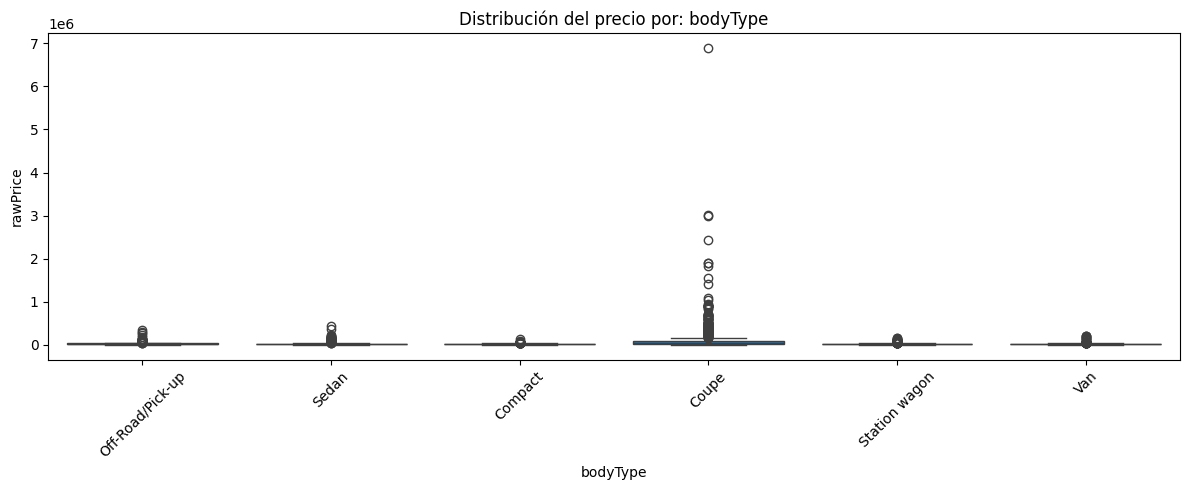

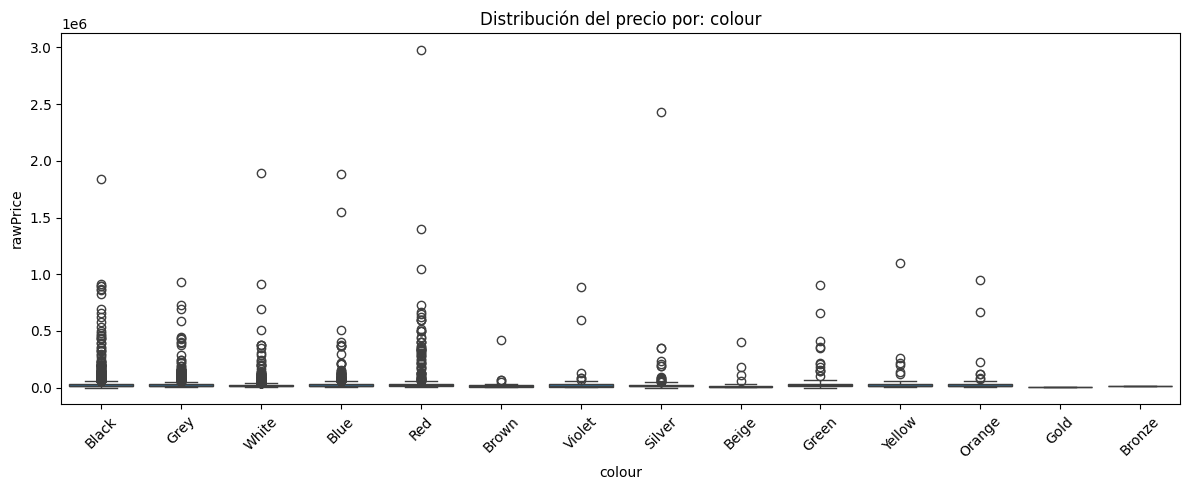

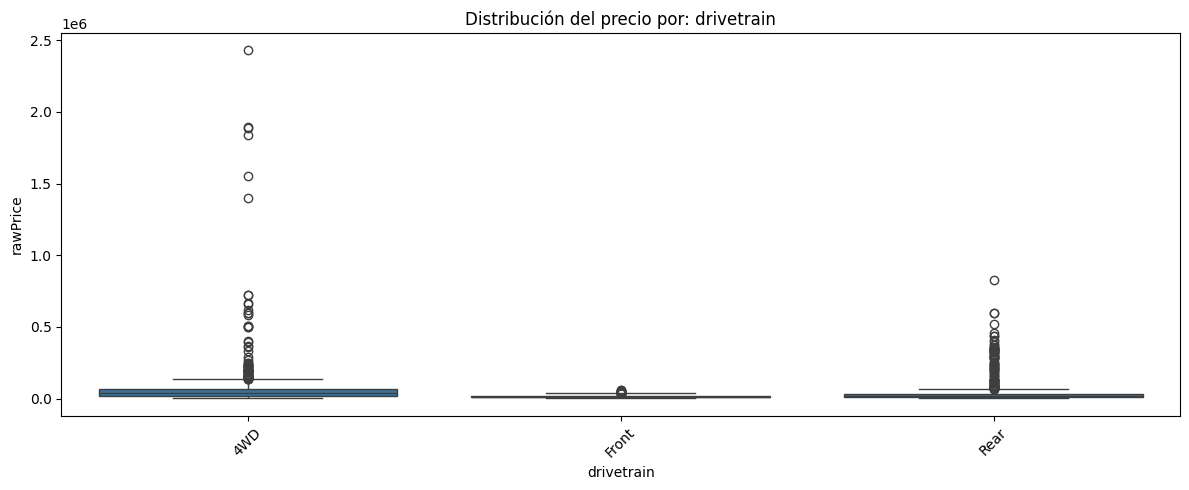

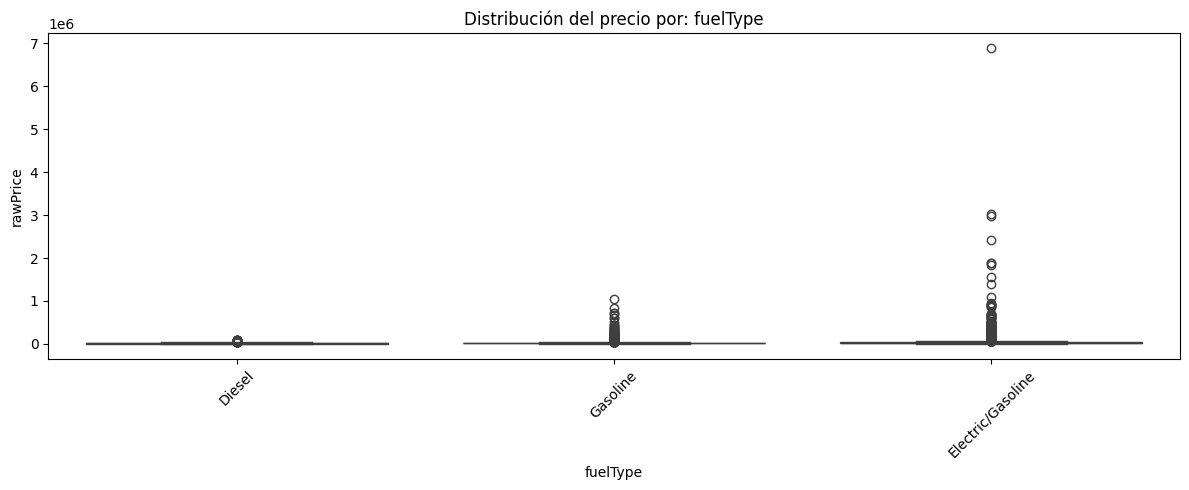

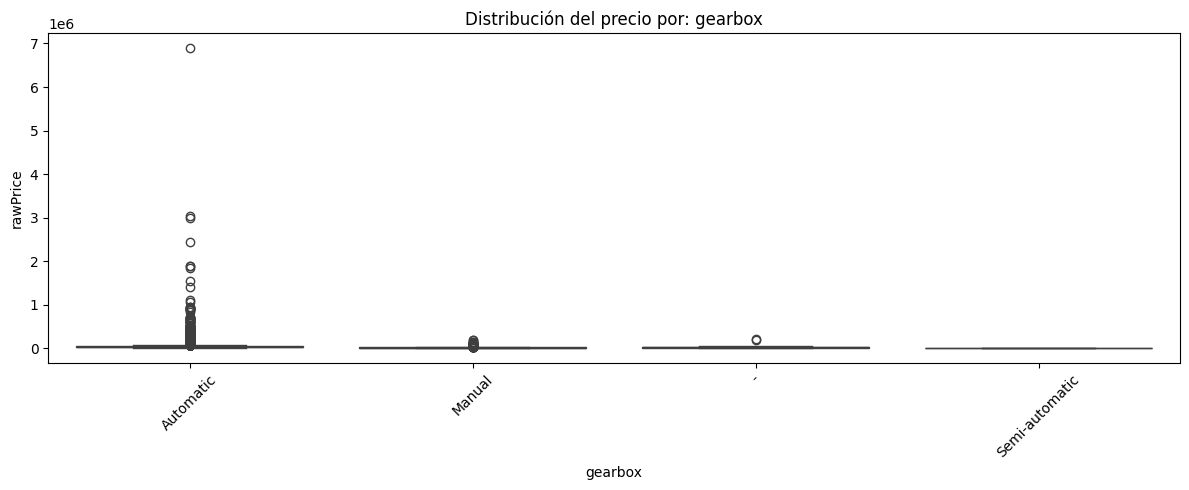

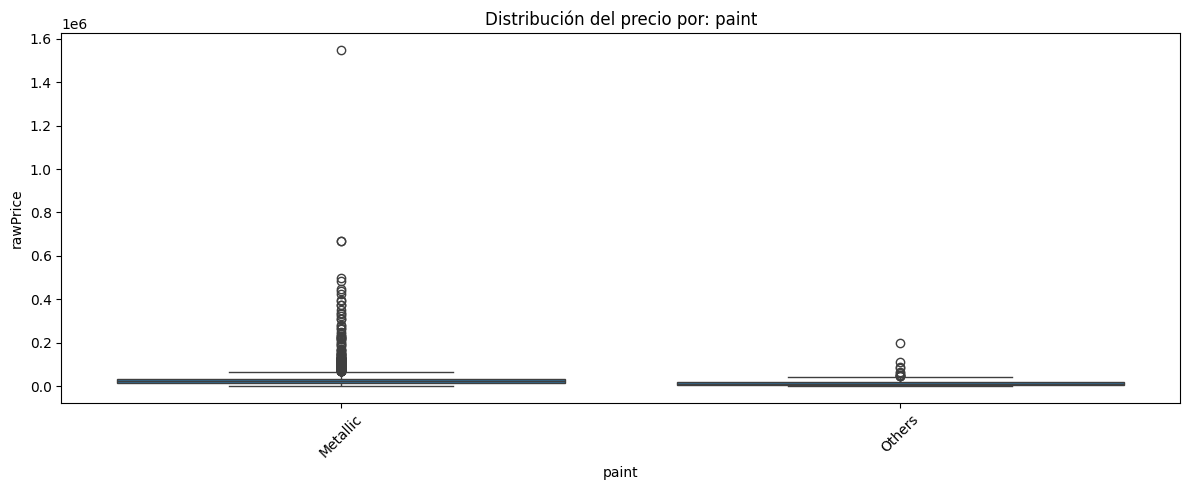

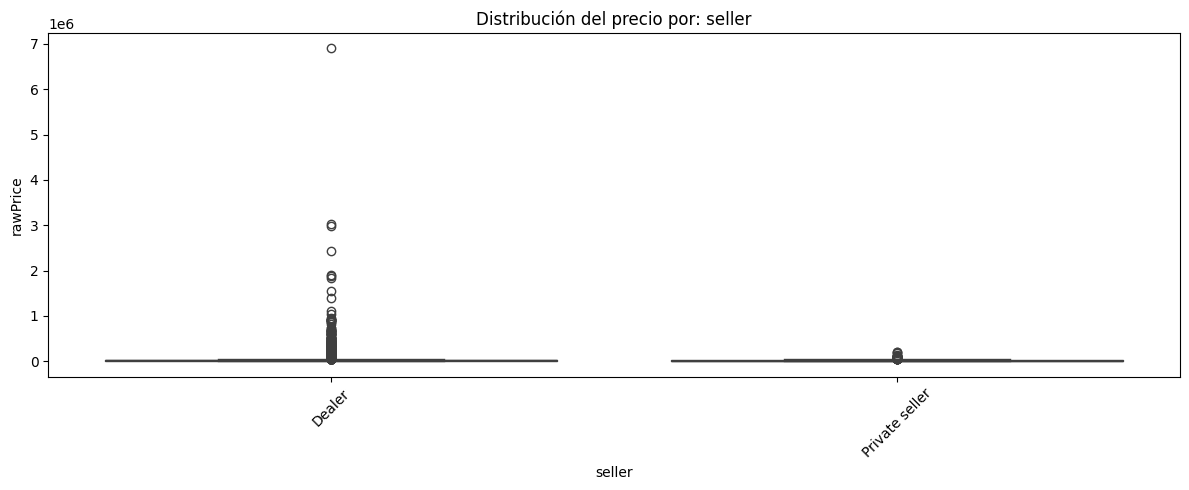

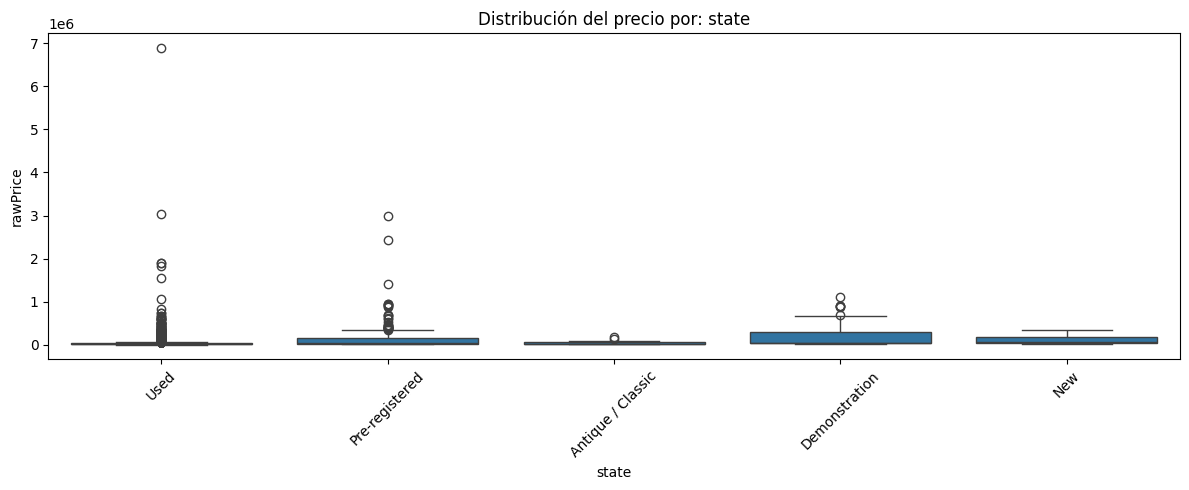

In [ ]:
# === BLOQUE ÚNICO: ANALIZAR TODAS LAS VARIABLES CATEGÓRICAS VS rawPrice ===

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar todas las variables categóricas
categoricas = df_cleaned.select_dtypes(include='object').columns

# Recorremos cada variable categórica y generamos un boxplot si tiene al menos 2 categorías únicas
for var in categoricas:
    if df_cleaned[var].nunique() > 1 and df_cleaned[var].nunique() < 30:  # evitamos columnas con demasiadas categorías
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=df_cleaned, x=var, y='rawPrice')
        plt.title(f'Distribución del precio por: {var}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Seleccionar variables categóricas
categoricas = df_cleaned.select_dtypes(include='object').columns

# Inicializamos lista para guardar resultados
resultados_anova = []

# Iteramos por cada variable categórica
for var in categoricas:
    try:
        grupos = []
        for categoria in df_cleaned[var].dropna().unique():
            valores = df_cleaned[df_cleaned[var] == categoria]['rawPrice'].dropna()
            if len(valores) > 1:
                grupos.append(valores)

        # Ejecutamos ANOVA solo si hay al menos 2 grupos válidos
        if len(grupos) >= 2:
            stat, p = f_oneway(*grupos)
            resultados_anova.append({'Variable': var, 'p-valor': p})
    except Exception as e:
        print(f"Error con variable '{var}': {e}")

# Convertimos a DataFrame y ordenamos
anova_df = pd.DataFrame(resultados_anova).sort_values('p-valor')

# Mostramos resultados
from IPython.display import display
display(anova_df)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Variable        p-valor
13                 fuelConsumption   0.000000e+00
10                      engineSize   0.000000e+00
28                           title   0.000000e+00
25                          safety   0.000000e+00
24                           price   0.000000e+00
23                           power   0.000000e+00
18                            mark   0.000000e+00
17              manufacturerColour   0.000000e+00
6                dealer/dealerName  3.432695e-222
2                          comfort  1.020510e-216
7                      description  1.904579e-208
3                     contactPhone  3.959945e-190
5     dealer/address/streetAddress  1.135689e-142
19                           media  2.519785e-114
0                         bodyType  1.249529e-106
8                       drivetrain   7.679412e-81
9                      emptyWeight   5.091199e-71
27                           state   4.447187e-68
15                         gearbox   8.936760e-30
14                        fuelType   2.359795e-25
1                           colour   5.317954e-17
11                          extras   1.095355e-15
12               firstRegistration   5.292233e-07
4   dealer/address/addressLocality   8.264469e-07
16                        location   7.755106e-06
22                           paint   5.041887e-05
26                          seller   5.244881e-03
21                    modelVersion   4.946568e-02
20                          milage   9.902147e-01

In [ ]:
# === ELIMINAR COLUMNAS DEFINITIVAS Y SEGURAS QUE NO APORTAN AL PRECIO ===

columnas_a_eliminar = [
    'contactName', 'contactPhone', 'countryVersion', 'currency',
    'dealer/address/contry', 'dealer/address/postalCode', 'dealer/address/streetAddress',
    'dealer/dealerName', 'description', 'extras', 'label',
    'offerNumber', 'paint', 'price', 'title', 'url'
]

# Eliminar solo si existen en el DataFrame
columnas_existentes = [col for col in columnas_a_eliminar if col in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=columnas_existentes)

# Confirmación
print(f"✅ Se eliminaron {len(columnas_existentes)} columnas. Ahora el dataset tiene {df_cleaned.shape[1]} columnas.")


✅ Se eliminaron 16 columnas. Ahora el dataset tiene 27 columnas.


In [ ]:
# === GUARDAR EL DATASET LIMPIO EN EXCEL PARA USO POSTERIOR ===

# Definir la ruta de salida
ruta_limpio = '/content/dataset_autoscout24_limpio_provisional.xlsx'

# Guardar el DataFrame actual sin columnas basura
df_cleaned.to_excel(ruta_limpio, index=False)

# Descargar el archivo desde Colab
from google.colab import files
files.download(ruta_limpio)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cleaned['colour'] = df_cleaned['colour'].fillna('Desconocido')


In [ ]:
# Imputar nulos de comfort con texto claro
df_cleaned['comfort'] = df_cleaned['comfort'].fillna('Sin info')


In [ ]:
# === IMPUTACIÓN INTELIGENTE DE 'cylinders' ===

import pandas as pd

# Asegurar que cylinders es numérico
df_cleaned['cylinders'] = pd.to_numeric(df_cleaned['cylinders'], errors='coerce')

# Extraer número de 'engineSize' si está en texto como '2.0 TDI'
df_cleaned['engineSize_num'] = pd.to_numeric(
    df_cleaned['engineSize'].astype(str).str.extract(r'(\d+\.\d+|\d+)')[0],
    errors='coerce'
)

# Crear bins para agrupar tamaño del motor
df_cleaned['engineSize_bin'] = pd.cut(
    df_cleaned['engineSize_num'],
    bins=[0, 1.4, 1.8, 2.2, 3.0, 5.0],
    labels=['≤1.4L', '1.5–1.8L', '1.9–2.2L', '2.3–3.0L', '>3.0L']
)

# Imputar 'cylinders' con mediana por grupo (fuelType + tamaño motor)
df_cleaned['cylinders'] = df_cleaned.groupby(
    ['fuelType', 'engineSize_bin']
)['cylinders'].transform(lambda x: x.fillna(x.median()))

# Confirmar cuántos quedan nulos (si falta engineSize o fuelType)
faltan = df_cleaned['cylinders'].isna().sum()
print(f"🔧 Nulos restantes tras imputación inteligente: {faltan}")


🔧 Nulos restantes tras imputación inteligente: 1532


<ipython-input-31-d4d1ffd8b043>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned['cylinders'] = df_cleaned.groupby(


In [ ]:
# Imputar los nulos restantes con mediana global
mediana_global = df_cleaned['cylinders'].median()
df_cleaned['cylinders'] = df_cleaned['cylinders'].fillna(mediana_global)

print(f"✅ Imputados los restantes con mediana global: {mediana_global}")


✅ Imputados los restantes con mediana global: 4.0


In [ ]:
df_cleaned['dealer/address/addressLocality'] = df_cleaned['dealer/address/addressLocality'].fillna('Desconocido')


In [ ]:
# Convertir a numérico por si acaso
df_cleaned['doors'] = pd.to_numeric(df_cleaned['doors'], errors='coerce')

# Imputar con la moda (valor más común)
moda_doors = df_cleaned['doors'].mode().iloc[0]
df_cleaned['doors'] = df_cleaned['doors'].fillna(moda_doors)

print(f"✅ 'doors' imputado con la moda: {moda_doors}")


✅ 'doors' imputado con la moda: 5.0


In [ ]:
df_cleaned['drivetrain'] = df_cleaned['drivetrain'].fillna('Desconocido')


In [ ]:
# LIMPIEZA DE 'emptyWeight': quitar 'kg', ',' y dejar como float

def limpiar_empty_weight(valor):
    try:
        limpio = (
            str(valor)
            .lower()
            .replace('kg', '')
            .replace(',', '')
            .replace(' ', '')
            .strip()
        )
        return float(limpio)
    except:
        return None

# Aplicar la función al DataFrame
df_cleaned['emptyWeight'] = df_cleaned['emptyWeight'].apply(limpiar_empty_weight)

# Confirmar tipo
print(df_cleaned['emptyWeight'].dtype)


float64


In [ ]:
# LIMPIEZA DE 'engineSize': eliminar 'cc', ',' y convertir a float (en cc)

def limpiar_engine_size(valor):
    try:
        limpio = (
            str(valor)
            .lower()
            .replace('cc', '')
            .replace(',', '')
            .replace('.', '')
            .replace(' ', '')
            .strip()
        )
        return float(limpio)
    except:
        return None

# Aplicar la función al DataFrame
df_cleaned['engineSize'] = df_cleaned['engineSize'].apply(limpiar_engine_size)

# Confirmar tipo y ejemplo
print(df_cleaned['engineSize'].dtype)
print(df_cleaned['engineSize'].dropna().head())


float64
0    2179.0
1    2143.0
2    1905.0
3    2143.0
4    2191.0
Name: engineSize, dtype: float64


In [ ]:
import pandas as pd
from datetime import datetime

# 1. Convertir a datetime
df_cleaned['firstRegistration'] = pd.to_datetime(
    df_cleaned['firstRegistration'], format='%m/%Y', errors='coerce'
)

# 2. Crear columna con año de fabricación
df_cleaned['year_firstRegistration'] = df_cleaned['firstRegistration'].dt.year

# 3. Crear columna con antigüedad (en años desde hoy)
df_cleaned['car_age'] = datetime.now().year - df_cleaned['year_firstRegistration']

# Mostrar ejemplos
print(df_cleaned[['firstRegistration', 'year_firstRegistration', 'car_age']].head())


  firstRegistration  year_firstRegistration  car_age
0        2013-07-01                  2013.0     12.0
1        2017-09-01                  2017.0      8.0
2        2000-03-01                  2000.0     25.0
3        2011-11-01                  2011.0     14.0
4        2015-07-01                  2015.0     10.0


In [ ]:
# LIMPIAR 'fuelConsumption' y dejarlo como float (ej: 6.5)

def limpiar_consumo(valor):
    try:
        limpio = (
            str(valor)
            .lower()
            .replace('l/100 km', '')
            .replace('(comb.)', '')
            .replace('(', '')
            .replace(')', '')
            .strip()
        )
        return float(limpio)
    except:
        return None

df_cleaned['fuelConsumption'] = df_cleaned['fuelConsumption'].apply(limpiar_consumo)

# Verificar ejemplo
print(df_cleaned['fuelConsumption'].dropna().head())


0     6.5
1     4.2
2    10.7
3     6.6
4     4.5
Name: fuelConsumption, dtype: float64


In [ ]:
# Primero rellenamos nulos con "Unknown"
df_cleaned['fuelType'] = df_cleaned['fuelType'].fillna('Unknown')

# Creamos una nueva columna simplificada
df_cleaned['fuelType_simplified'] = df_cleaned['fuelType'].replace({
    'Electric/Gasoline': 'Hybrid',
    'Gasoline': 'Gasoline',
    'Diesel': 'Diesel',
    'Unknown': 'Unknown'  # por si ya estaba como nulo
})


In [ ]:
# Imputar valores nulos con 'Unknown'
df_cleaned['gearbox'] = df_cleaned['gearbox'].fillna('Unknown')

# Normalizar a minúscula por si hay inconsistencias (opcional)
df_cleaned['gearbox'] = df_cleaned['gearbox'].str.capitalize()


In [ ]:
# Asegurarse que es numérica
df_cleaned['gears'] = pd.to_numeric(df_cleaned['gears'], errors='coerce')

# Imputar con la mediana
mediana_gears = df_cleaned['gears'].median()
df_cleaned['gears'] = df_cleaned['gears'].fillna(mediana_gears)

print(f"✅ 'gears' imputado con mediana: {mediana_gears}")


✅ 'gears' imputado con mediana: 6.0


In [ ]:
# Imputar valores nulos con 'Desconocido'
df_cleaned['location'] = df_cleaned['location'].fillna('Desconocido')

# Limpiar: quitar ", ES" y espacios
df_cleaned['location'] = df_cleaned['location'].str.replace(', ES', '', regex=False).str.strip()

# Ver ejemplos
print(df_cleaned['location'].unique()[:10])


['LLERONA' 'SABADELL' 'JAEN' 'MÁLAGA' 'MADRID' 'CASTELLDEFELS'
 'SAN FERNANDO DE HENARES' 'Arriaga- Erandio' 'MOSTOLES'
 'Sant Andreu de la Barca']


In [ ]:
# Rellenar nulos con texto explícito
df_cleaned['media'] = df_cleaned['media'].fillna('Sin info')


In [ ]:
df_cleaned = df_cleaned.drop(columns=['modelVersion'])
print("✅ 'modelVersion' eliminada del dataset.")


✅ 'modelVersion' eliminada del dataset.


In [ ]:
# Extraer número entre paréntesis que representa los caballos
import re

def extraer_hp(valor):
    try:
        texto = str(valor)
        match = re.search(r'\((\d+)\s*hp\)', texto.lower())
        if match:
            return float(match.group(1))
        else:
            return None
    except:
        return None

df_cleaned['power'] = df_cleaned['power'].apply(extraer_hp)

# Mostrar resultados
print(df_cleaned['power'].dropna().head())


0    190.0
1    136.0
2     75.0
3    163.0
4    150.0
Name: power, dtype: float64


In [ ]:
df_cleaned['safety'] = df_cleaned['safety'].fillna('Sin info')


In [ ]:
# Asegurar que es numérica
df_cleaned['seats'] = pd.to_numeric(df_cleaned['seats'], errors='coerce')

# Calcular la moda (valor más repetido)
moda_seats = df_cleaned['seats'].mode().iloc[0]

# Imputar nulos con la moda
df_cleaned['seats'] = df_cleaned['seats'].fillna(moda_seats)

print(f"✅ 'seats' imputado con la moda: {moda_seats}")


✅ 'seats' imputado con la moda: 5.0


In [ ]:
# === GUARDAR EL DATASET TRATADO ===

# Ruta de salida
ruta_final = '/content/autoscout24_dataset_limpio_variables.xlsx'

# Guardar como Excel
df_cleaned.to_excel(ruta_final, index=False)

# Descargar desde Colab
from google.colab import files
files.download(ruta_final)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 Correlaciones numéricas con 'rawPrice':


power                     0.644321
engineSize                0.368003
emptyWeight               0.190903
cylinders                 0.180907
year_firstRegistration    0.102475
gears                     0.081796
fuelConsumption          -0.024272
engineSize_num           -0.050974
car_age                  -0.102475
milage_num               -0.162695
seats                    -0.170676
doors                    -0.269260
Name: rawPrice, dtype: float64

<ipython-input-50-52042e51d0aa>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='viridis')


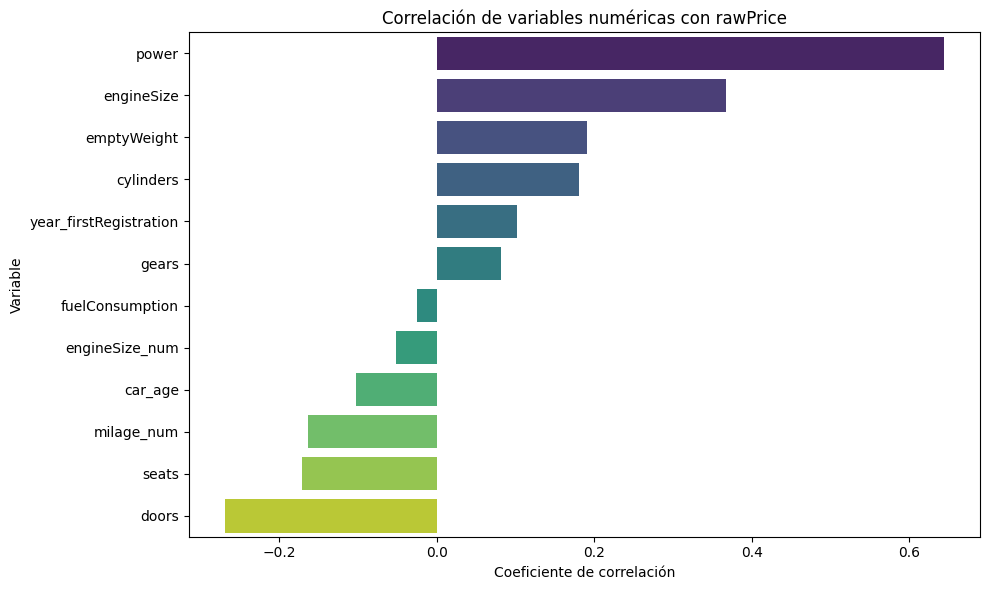

Variable        p-valor
8                             mark   0.000000e+00
14                  engineSize_bin  1.207095e-191
0                         bodyType  1.249529e-106
13                           state   4.447187e-68
11                          safety   1.188402e-35
4                       drivetrain   2.915939e-35
6                          gearbox   8.936760e-30
5                         fuelType   2.359795e-25
15             fuelType_simplified   2.359795e-25
3   dealer/address/addressLocality   2.384641e-10
1                           colour   3.578242e-08
2                          comfort   3.791667e-06
7                         location   3.932397e-06
12                          seller   5.244881e-03
9                            media   5.787327e-03
10                          milage   9.902147e-01

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-50-52042e51d0aa>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-np.log10(anova_plot['p-valor']), y=anova_plot['Variable'], palette='magma')


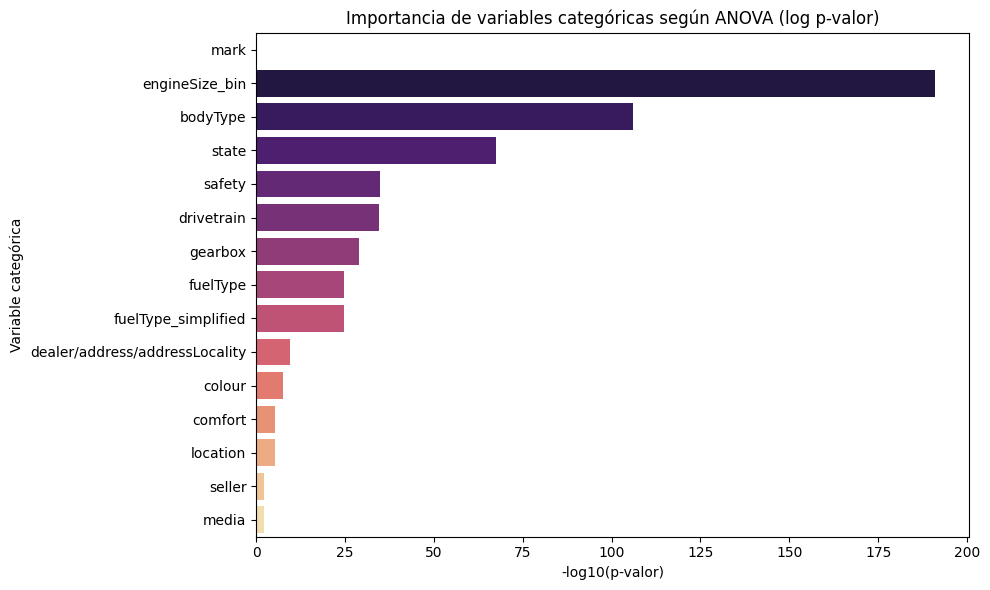

In [ ]:
# === INSTALAR LIBRERÍAS NECESARIAS ===
!pip install openpyxl

# === IMPORTACIONES ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# === CARGAR EL DATASET LIMPIO ===
ruta = '/content/autoscout24_dataset_limpio_variables def.xlsx'
df = pd.read_excel(ruta)

# === 1. CORRELACIÓN DE VARIABLES NUMÉRICAS CON rawPrice ===
numericas = df.select_dtypes(include=['float64', 'int64'])
correlaciones = numericas.corr()['rawPrice'].drop('rawPrice').sort_values(ascending=False)

# MOSTRAR COMO TABLA
print("📊 Correlaciones numéricas con 'rawPrice':")
display(correlaciones)

# PLOT DE CORRELACIONES
plt.figure(figsize=(10,6))
sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='viridis')
plt.title("Correlación de variables numéricas con rawPrice")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# === 2. ANÁLISIS DE VARIABLES CATEGÓRICAS CON ANOVA ===
categoricas = df.select_dtypes(include='object').columns
resultados_anova = []

for var in categoricas:
    try:
        grupos = []
        for categoria in df[var].dropna().unique():
            valores = df[df[var] == categoria]['rawPrice'].dropna()
            if len(valores) > 1:
                grupos.append(valores)
        if len(grupos) >= 2:
            stat, p = f_oneway(*grupos)
            resultados_anova.append({'Variable': var, 'p-valor': p})
    except Exception as e:
        print(f"Error con variable {var}: {e}")

# CONVERTIR A DATAFRAME Y ORDENAR
anova_df = pd.DataFrame(resultados_anova).sort_values('p-valor')
display(anova_df)

# PLOT DE CATEGÓRICAS SIGNIFICATIVAS
anova_plot = anova_df[anova_df['p-valor'] < 0.05].sort_values('p-valor')
plt.figure(figsize=(10,6))
sns.barplot(x=-np.log10(anova_plot['p-valor']), y=anova_plot['Variable'], palette='magma')
plt.title("Importancia de variables categóricas según ANOVA (log p-valor)")
plt.xlabel("-log10(p-valor)")
plt.ylabel("Variable categórica")
plt.tight_layout()
plt.show()


📊 Matriz de correlación completa entre variables numéricas:


cylinders  doors  emptyWeight  engineSize  \
cylinders                    1.00  -0.28         0.48        0.76   
doors                       -0.28   1.00        -0.00       -0.36   
emptyWeight                  0.48  -0.00         1.00        0.61   
engineSize                   0.76  -0.36         0.61        1.00   
fuelConsumption              0.35  -0.22         0.19        0.43   
gears                        0.20  -0.08         0.37        0.19   
power                        0.60  -0.38         0.60        0.70   
rawPrice                     0.18  -0.27         0.19        0.37   
seats                       -0.27   0.47         0.12       -0.28   
milage_num                   0.07  -0.02         0.08        0.11   
engineSize_num              -0.07   0.07        -0.26       -0.27   
year_firstRegistration      -0.16   0.19         0.03       -0.22   
car_age                      0.16  -0.19        -0.03        0.22   

                        fuelConsumption  gears  power  rawPrice  seats  \
cylinders                          0.35   0.20   0.60      0.18  -0.27   
doors                             -0.22  -0.08  -0.38     -0.27   0.47   
emptyWeight                        0.19   0.37   0.60      0.19   0.12   
engineSize                         0.43   0.19   0.70      0.37  -0.28   
fuelConsumption                    1.00   0.25   0.11     -0.02   0.05   
gears                              0.25   1.00   0.26      0.08   0.08   
power                              0.11   0.26   1.00      0.64  -0.30   
rawPrice                          -0.02   0.08   0.64      1.00  -0.17   
seats                              0.05   0.08  -0.30     -0.17   1.00   
milage_num                         0.37   0.06  -0.16     -0.16   0.12   
engineSize_num                    -0.12  -0.06  -0.16     -0.05  -0.02   
year_firstRegistration            -0.52   0.03   0.10      0.10   0.02   
car_age                            0.52  -0.03  -0.10     -0.10  -0.02   

                        milage_num  engineSize_num  year_firstRegistration  \
cylinders                     0.07           -0.07                   -0.16   
doors                        -0.02            0.07                    0.19   
emptyWeight                   0.08           -0.26                    0.03   
engineSize                    0.11           -0.27                   -0.22   
fuelConsumption               0.37           -0.12                   -0.52   
gears                         0.06           -0.06                    0.03   
power                        -0.16           -0.16                    0.10   
rawPrice                     -0.16           -0.05                    0.10   
seats                         0.12           -0.02                    0.02   
milage_num                    1.00           -0.13                   -0.62   
engineSize_num               -0.13            1.00                    0.12   
year_firstRegistration       -0.62            0.12                    1.00   
car_age                       0.62           -0.12                   -1.00   

                        car_age  
cylinders                  0.16  
doors                     -0.19  
emptyWeight               -0.03  
engineSize                 0.22  
fuelConsumption            0.52  
gears                     -0.03  
power                     -0.10  
rawPrice                  -0.10  
seats                     -0.02  
milage_num                 0.62  
engineSize_num            -0.12  
year_firstRegistration    -1.00  
car_age                    1.00

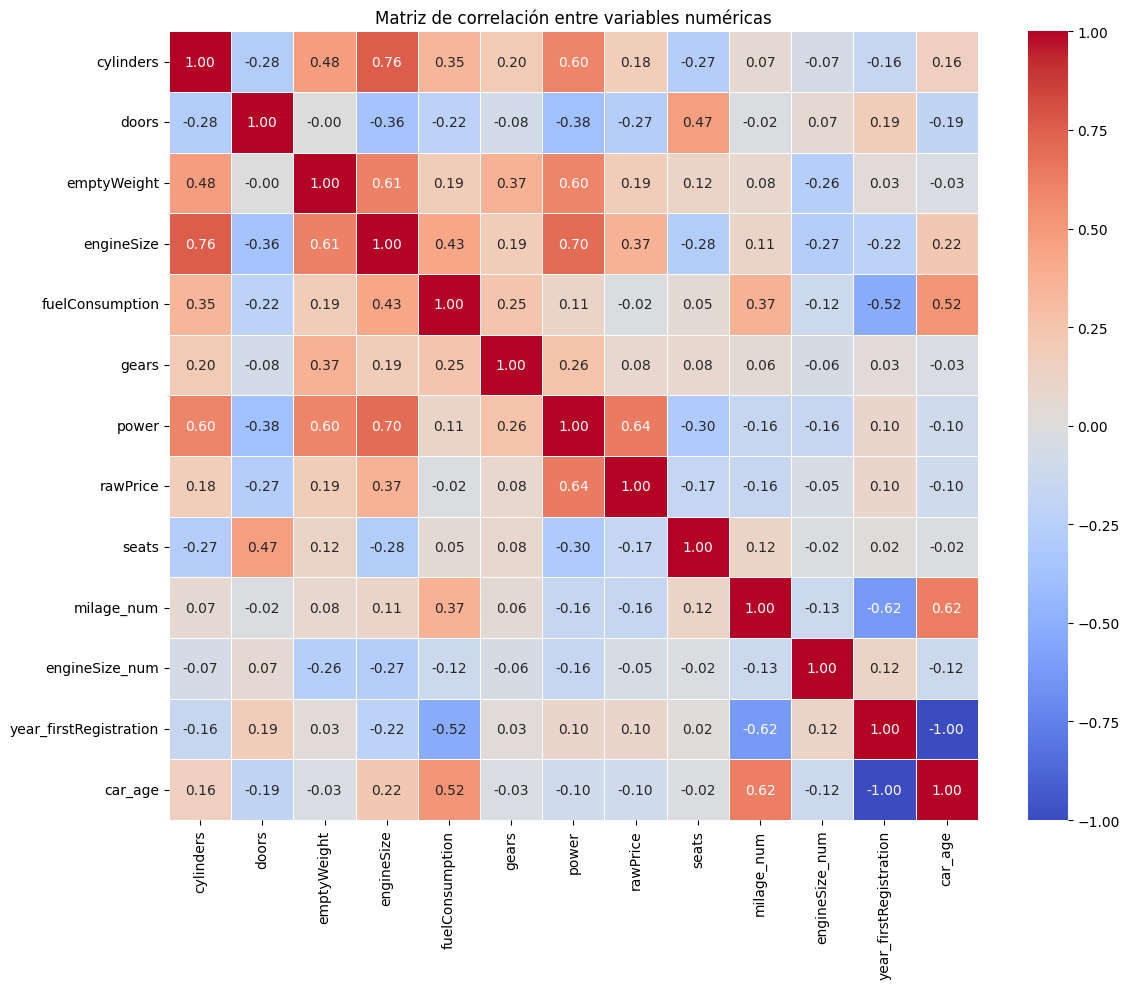

In [ ]:
# === MATRIZ COMPLETA DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS ===

# Seleccionamos solo las variables numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación
matriz_corr = numericas.corr().round(2)

# MOSTRAR COMO TABLA
print("📊 Matriz de correlación completa entre variables numéricas:")
display(matriz_corr)

# HEATMAP DE LA MATRIZ
plt.figure(figsize=(12,10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


In [ ]:
# === 1. CARGAR EL DATASET ORIGINAL ===
import pandas as pd

ruta_origen = '/content/autoscout24_dataset_limpio_def.xlsx'
df = pd.read_excel(ruta_origen)

# === 2. BINARIZAR 'comfort' EN VARIABLES AGRUPADAS ===

# Asegurarse de que no haya nulos
df['comfort'] = df['comfort'].fillna('')

# Función para detectar si hay al menos una de las etiquetas clave en la celda
def contiene(lista_etiquetas, texto):
    return int(any(etiqueta.lower() in str(texto).lower() for etiqueta in lista_etiquetas))

# Crear columnas binarias agrupadas
df['has_climate_control'] = df['comfort'].apply(lambda x: contiene(
    ['Air conditioning', 'Automatic climate control'], x))

df['has_cruise_control'] = df['comfort'].apply(lambda x: contiene(
    ['Cruise control'], x))

df['has_multifunction_steering'] = df['comfort'].apply(lambda x: contiene(
    ['Multi-function steering wheel'], x))

df['has_sensors'] = df['comfort'].apply(lambda x: contiene(
    ['Rain sensor', 'Light sensor'], x))

df['has_premium_features'] = df['comfort'].apply(lambda x: contiene(
    ['Navigation', 'Electrically adjustable seats', 'Heated', 'Electric steering wheel adjustment'], x))

# === 3. GUARDAR EL NUEVO DATASET CON LAS COLUMNAS BINARIAS ===

ruta_salida = '/content/autoscout24_dataset_confort_binarizado.xlsx'
df.to_excel(ruta_salida, index=False)

# === 4. DESCARGAR EL ARCHIVO ACTUALIZADO ===
from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === 1. BINARIZAR 'safety' CON 4 VARIABLES ÚTILES ===

# Asegurar que no haya nulos
df['safety'] = df['safety'].fillna('')

# Función para detección de etiquetas
def contiene(lista_etiquetas, texto):
    return int(any(etiqueta.lower() in str(texto).lower() for etiqueta in lista_etiquetas))

# Crear columnas binarias
df['has_abs'] = df['safety'].apply(lambda x: contiene(['ABS'], x))

df['has_airbags'] = df['safety'].apply(lambda x: contiene([
    'Driver-side airbag', 'Passenger-side airbag', 'Side airbag', 'Rear airbag'
], x))

df['has_traction_control'] = df['safety'].apply(lambda x: contiene([
    'Traction control', 'Electronic stability control'
], x))

df['has_power_steering'] = df['safety'].apply(lambda x: contiene(['Power steering'], x))

# === 2. GUARDAR DATASET ACTUALIZADO ===
ruta_salida = '/content/autoscout24_dataset_safety_binarizado.xlsx'
df.to_excel(ruta_salida, index=False)

# === 3. DESCARGAR ARCHIVO DESDE COLAB ===
from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === 1. CREAR VARIABLE BINARIA DESDE 'media' ===

# Asegurar que no haya nulos
df['media'] = df['media'].fillna('')

# Crear columna binaria: contiene 'Bluetooth'
df['has_bluetooth'] = df['media'].apply(lambda x: int('bluetooth' in str(x).lower()))

# === 2. ELIMINAR LA COLUMNA ORIGINAL 'media' ===
df = df.drop(columns=['media'])

# === 3. GUARDAR EL DATASET ACTUALIZADO ===
ruta_salida = '/content/autoscout24_dataset_bluetooth_final.xlsx'
df.to_excel(ruta_salida, index=False)

# === 4. DESCARGAR EL ARCHIVO ===
from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === 1. ELIMINAR FILAS SIN 'bodyType' ===
df = df[~df['bodyType'].isnull() & (df['bodyType'] != '')]

# === 2. CORREGIR LOCALIDADES CON CÓDIGO POSTAL ===
df['dealer/address/addressLocality'] = df['dealer/address/addressLocality'].replace({
    '22006': 'Huesca',
    '29004': 'Málaga'
})

# === 3. GUARDAR Y DESCARGAR ARCHIVO ACTUALIZADO ===
ruta_salida = '/content/autoscout24_dataset_actualizado_localidades_bodytype.xlsx'
df.to_excel(ruta_salida, index=False)

from google.colab import files
files.download(ruta_salida)


<ipython-input-5-03ef643264bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dealer/address/addressLocality'] = df['dealer/address/addressLocality'].replace({


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === 1. IMPUTAR 'engineSize' POR MEDIANA DE bodyType + fuelType ===
df['engineSize'] = df.groupby(['bodyType', 'fuelType'])['engineSize'].transform(
    lambda x: x.fillna(x.median())
)

# === 2. REGENERAR engineSize_bin EN BASE A engineSize EN cc ===
df['engineSize_bin'] = pd.cut(
    df['engineSize'] / 1000,  # convertimos temporalmente a litros solo para binning
    bins=[0, 1.4, 1.8, 2.2, 3.0, 5.0],
    labels=['≤1.4L', '1.5–1.8L', '1.9–2.2L', '2.3–3.0L', '>3.0L']
)

# === 3. ELIMINAR COLUMNA 'emptyWeight' ===
df = df.drop(columns=['emptyWeight'])

# === 4. ELIMINAR FILAS SIN 'firstRegistration' ===
df = df[~df['firstRegistration'].isnull()]

# === 5. GUARDAR Y DESCARGAR EXCEL ACTUALIZADO ===
ruta_salida = '/content/autoscout24_dataset_final_transformado.xlsx'
df.to_excel(ruta_salida, index=False)

from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === 1. CARGAR DATASET DESDE LA RUTA INDICADA ===
import pandas as pd

ruta = '/content/autoscout24_dataset_limpio_def.xlsx'
df = pd.read_excel(ruta)

# === 2. IMPUTAR engineSize CON MEDIANA POR GRUPO ===
df['engineSize'] = df.groupby(['bodyType', 'fuelType'])['engineSize'].transform(
    lambda x: x.fillna(x.median())
)

# === 3. REGENERAR engineSize_bin DESDE engineSize EN cc ===
df['engineSize_bin'] = pd.cut(
    df['engineSize'] / 1000,  # solo para agrupar visualmente
    bins=[0, 1.4, 1.8, 2.2, 3.0, 5.0],
    labels=['≤1.4L', '1.5–1.8L', '1.9–2.2L', '2.3–3.0L', '>3.0L']
)

# === 4. ELIMINAR FILAS CON 'firstRegistration' NULO ===
df = df[~df['firstRegistration'].isnull()]

# === 5. ELIMINAR 'emptyWeight' SI EXISTE ===
if 'emptyWeight' in df.columns:
    df = df.drop(columns=['emptyWeight'])

# === 6. GUARDAR Y DESCARGAR DATASET ACTUALIZADO ===
ruta_salida = '/content/autoscout24_dataset_limpio_def_actualizado.xlsx'
df.to_excel(ruta_salida, index=False)

from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 Correlaciones numéricas con 'rawPrice':


power                         0.511239
engineSize                    0.222634
cylinders                     0.151699
year_firstRegistration        0.092618
gears                         0.072296
fuelConsumption              -0.014917
has_premium_features         -0.016137
has_multifunction_steering   -0.040613
has_sensors                  -0.041550
has_cruise_control           -0.052828
has_traction_control         -0.056722
has_bluetooth                -0.066285
has_power_steering           -0.087199
car_age                      -0.092618
has_abs                      -0.099932
has_climate_control          -0.100245
has_airbags                  -0.101477
seats                        -0.139884
milage_num                   -0.155833
doors                        -0.173395
Name: rawPrice, dtype: float64

<ipython-input-2-2b5d32f22926>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='viridis')


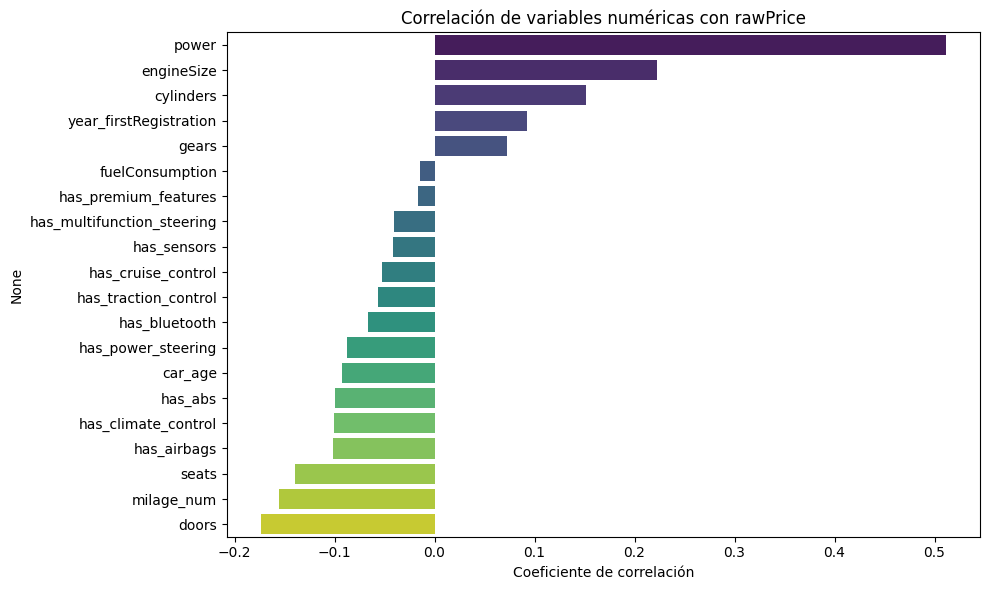

🧪 Resultados ANOVA (variables categóricas vs. rawPrice):


Variable       p-valor
5                 mark  0.000000e+00
0             bodyType  3.439535e-87
8       engineSize_bin  4.545139e-75
7                state  6.832654e-60
2           drivetrain  3.855874e-31
3              gearbox  2.111085e-27
9  fuelType_simplified  2.400722e-21
1               colour  2.072719e-06
6               seller  2.475196e-03
4             location  1.000000e+00

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-2-2b5d32f22926>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-np.log10(anova_plot['p-valor']), y=anova_plot['Variable'], palette='magma')


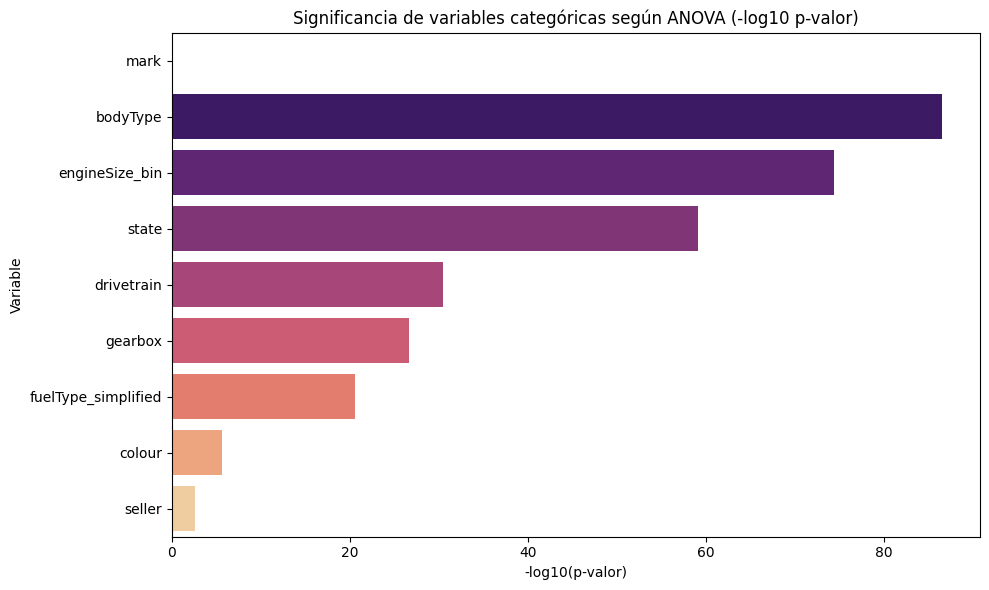

In [ ]:
# === IMPORTACIONES NECESARIAS ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np

# === CARGA DEL DATASET ===
ruta = '/content/autoscout24_dataset_limpio_def.xlsx'
df = pd.read_excel(ruta)

# === LISTA DE VARIABLES INDICADAS ===
variables = [
    'bodyType', 'colour', 'cylinders', 'doors', 'drivetrain', 'engineSize',
    'firstRegistration', 'fuelConsumption', 'gearbox', 'gears', 'location',
    'mark', 'power', 'rawPrice', 'seats', 'seller', 'state', 'milage_num',
    'engineSize_bin', 'year_firstRegistration', 'car_age', 'fuelType_simplified',
    'has_climate_control', 'has_cruise_control', 'has_multifunction_steering',
    'has_sensors', 'has_premium_features', 'has_abs', 'has_airbags',
    'has_traction_control', 'has_power_steering', 'has_bluetooth'
]

# === 1. CORRELACIÓN CON rawPrice (NUMÉRICAS) ===
numericas = df[variables].select_dtypes(include=['int64', 'float64'])
correlaciones = numericas.corr()['rawPrice'].drop('rawPrice').sort_values(ascending=False)

# Mostrar tabla
print("📊 Correlaciones numéricas con 'rawPrice':")
display(correlaciones)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='viridis')
plt.title("Correlación de variables numéricas con rawPrice")
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()

# === 2. ANOVA PARA VARIABLES CATEGÓRICAS ===
categoricas = [var for var in variables if df[var].dtype == 'object' or str(df[var].dtype).startswith('category')]
anova_resultados = []

for var in categoricas:
    try:
        grupos = [df[df[var] == cat]['rawPrice'].dropna() for cat in df[var].dropna().unique()]
        if len(grupos) >= 2:
            stat, p = f_oneway(*grupos)
            anova_resultados.append({'Variable': var, 'p-valor': p})
    except Exception as e:
        print(f"Error con {var}: {e}")

anova_df = pd.DataFrame(anova_resultados).sort_values(by='p-valor')

# Mostrar tabla
print("🧪 Resultados ANOVA (variables categóricas vs. rawPrice):")
display(anova_df)

# Gráfico de p-valores (log)
plt.figure(figsize=(10,6))
anova_plot = anova_df[anova_df['p-valor'] < 0.05]
sns.barplot(x=-np.log10(anova_plot['p-valor']), y=anova_plot['Variable'], palette='magma')
plt.title("Significancia de variables categóricas según ANOVA (-log10 p-valor)")
plt.xlabel("-log10(p-valor)")
plt.tight_layout()
plt.show()


<ipython-input-2-290955895283>:30: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


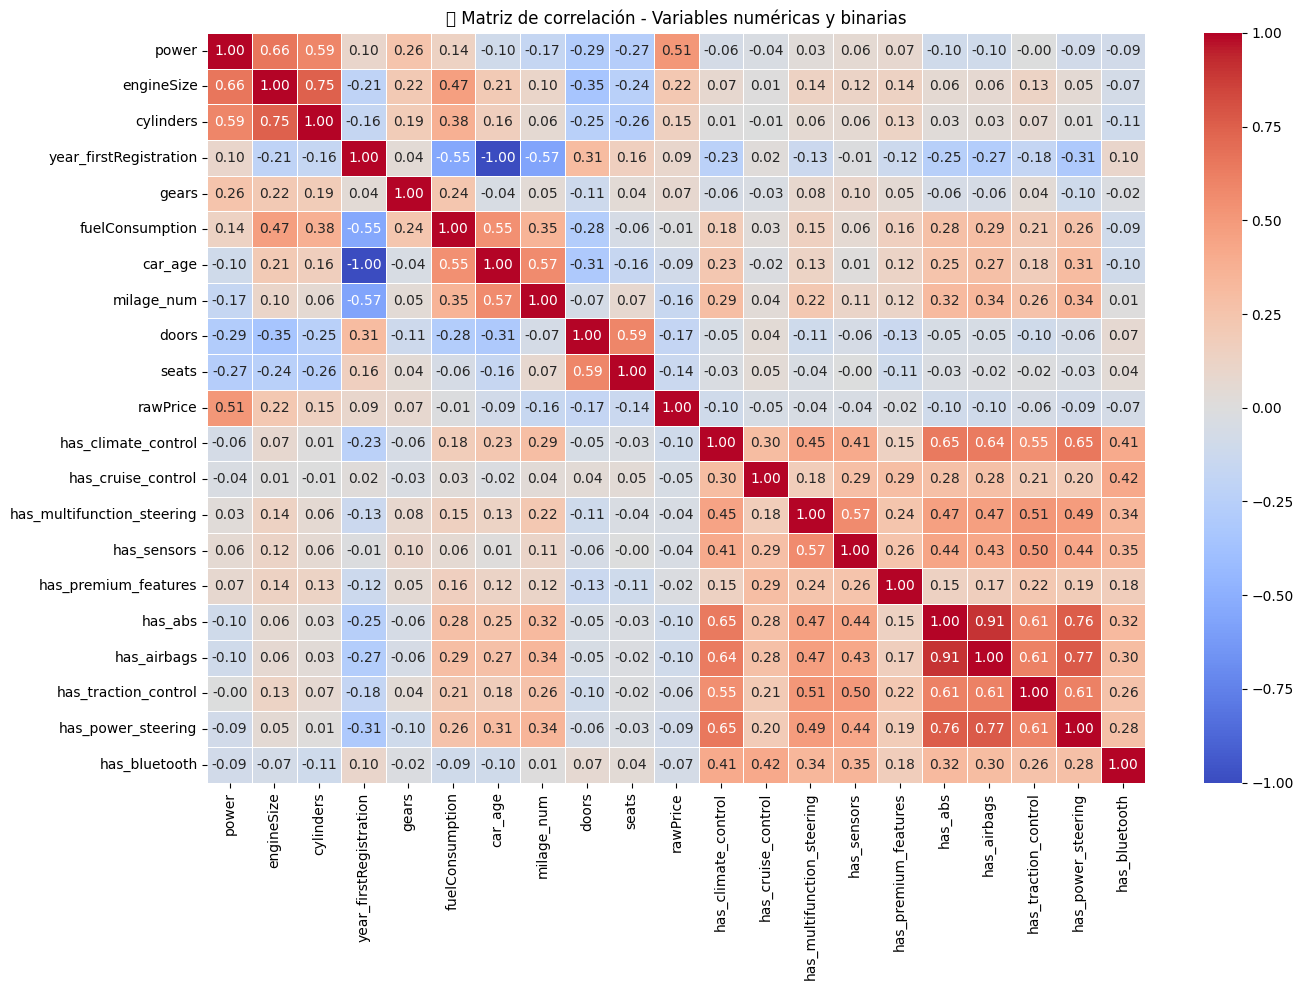

In [ ]:
# === IMPORTACIONES NECESARIAS ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === CARGA DEL DATASET === (actualiza ruta si es necesario)
ruta = '/content/autoscout24_dataset_limpio_def.xlsx'
df = pd.read_excel(ruta)

# === SELECCIONAR SOLO VARIABLES NUMÉRICAS Y BINARIAS ===
variables_correlacion = [
    'power', 'engineSize', 'cylinders', 'year_firstRegistration', 'gears',
    'fuelConsumption', 'car_age', 'milage_num', 'doors', 'seats', 'rawPrice',
    'has_climate_control', 'has_cruise_control', 'has_multifunction_steering',
    'has_sensors', 'has_premium_features', 'has_abs', 'has_airbags',
    'has_traction_control', 'has_power_steering', 'has_bluetooth'
]

# Filtrar solo columnas presentes
vars_presentes = [col for col in variables_correlacion if col in df.columns]
df_corr = df[vars_presentes]

# === MATRIZ DE CORRELACIÓN ===
correlation_matrix = df_corr.corr()

# === HEATMAP VISUAL ===
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Matriz de correlación - Variables numéricas y binarias")
plt.tight_layout()
plt.show()


In [ ]:
# === 1. CARGAR ARCHIVO PRINCIPAL ===
import pandas as pd

ruta_entrada = '/content/autoscout24_dataset_limpio_def.xlsx'
df = pd.read_excel(ruta_entrada)

# === 2. ELIMINAR FILAS CON power VACÍO ===
df = df[~df['power'].isnull()]

# === 3. GUARDAR Y DESCARGAR EXCEL ACTUALIZADO ===
ruta_salida = '/content/autoscout24_dataset_limpio_def_sin_power_nulos.xlsx'
df.to_excel(ruta_salida, index=False)

from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === 1. CARGAR ARCHIVO ===
import pandas as pd

ruta_entrada = '/content/autoscout24_dataset_limpio_def.xlsx'
df = pd.read_excel(ruta_entrada)

# === 2. DIVIDIR 'mark' EN 'brand' Y 'model_detail' ===
df['mark'] = df['mark'].astype(str)
df['brand'] = df['mark'].str.split().str[0]
df['model_detail'] = df['mark'].str.split(n=1).str[1]

# === 3. EXTRAER AÑO DE 'firstRegistration' ===
df['firstRegistration'] = pd.to_datetime(df['firstRegistration'], errors='coerce')
df['year_firstRegistration'] = df['firstRegistration'].dt.year

# === 4. GUARDAR Y DESCARGAR ARCHIVO ACTUALIZADO ===
ruta_salida = '/content/autoscout24_dataset_con_brand_y_anyo.xlsx'
df.to_excel(ruta_salida, index=False)

from google.colab import files
files.download(ruta_salida)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 Correlaciones numéricas y binarias con rawPrice:


power                         0.511800
engineSize                    0.268787
cylinders                     0.227093
year_firstRegistration        0.108108
gears                         0.099295
has_premium_features         -0.014999
has_multifunction_steering   -0.034797
has_sensors                  -0.037393
has_traction_control         -0.052160
has_cruise_control           -0.055201
has_bluetooth                -0.069321
has_power_steering           -0.087888
has_abs                      -0.099866
has_airbags                  -0.102384
has_climate_control          -0.103925
car_age                      -0.108108
doors                        -0.172668
milage_num                   -0.176291
seats                        -0.209846
Name: rawPrice, dtype: float64

<ipython-input-2-ec890f49da56>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='viridis')


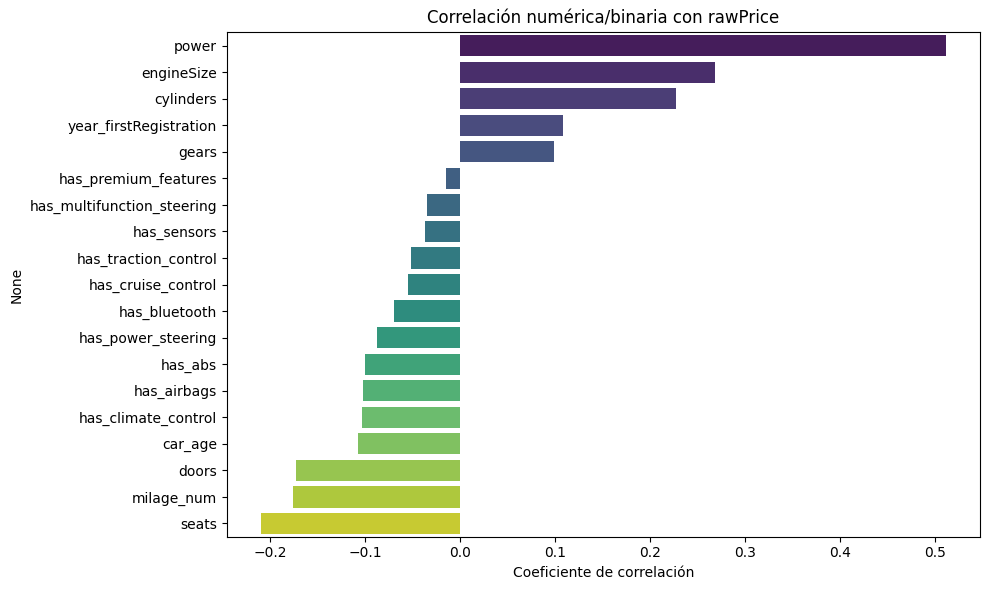

🧪 ANOVA (categorical variables vs rawPrice):


Variable       p-valor
5                  mark  0.000000e+00
9                 brand  0.000000e+00
10         model_detail  0.000000e+00
0              bodyType  8.972609e-97
2            drivetrain  2.362941e-54
7                 state  5.395045e-51
3               gearbox  2.316923e-38
8   fuelType_simplified  1.340835e-20
1                colour  2.270783e-08
6                seller  9.293065e-04
4              location  1.000000e+00

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-2-ec890f49da56>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=-np.log10(anova_plot['p-valor']), y=anova_plot['Variable'], palette='magma')


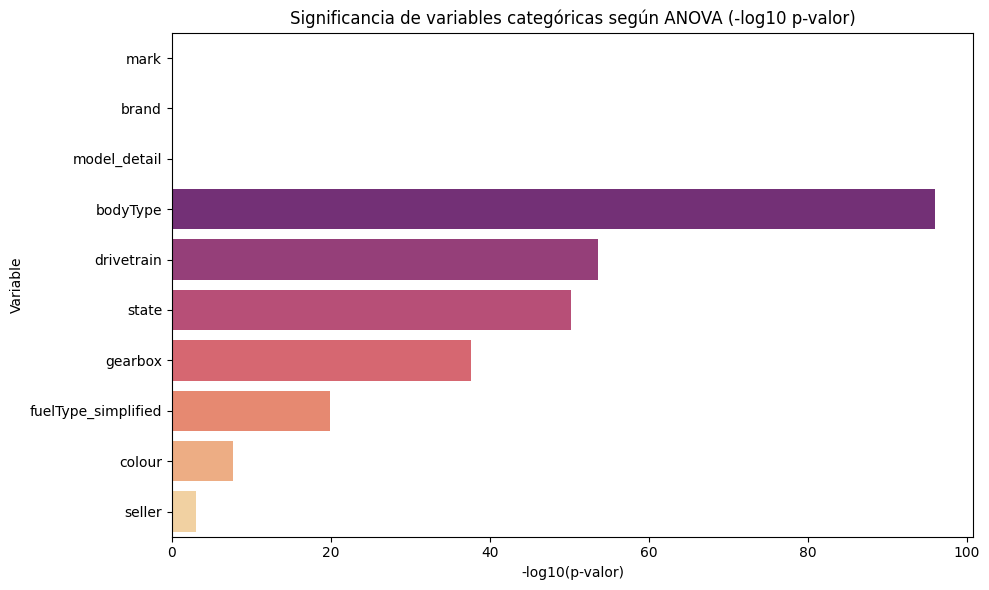

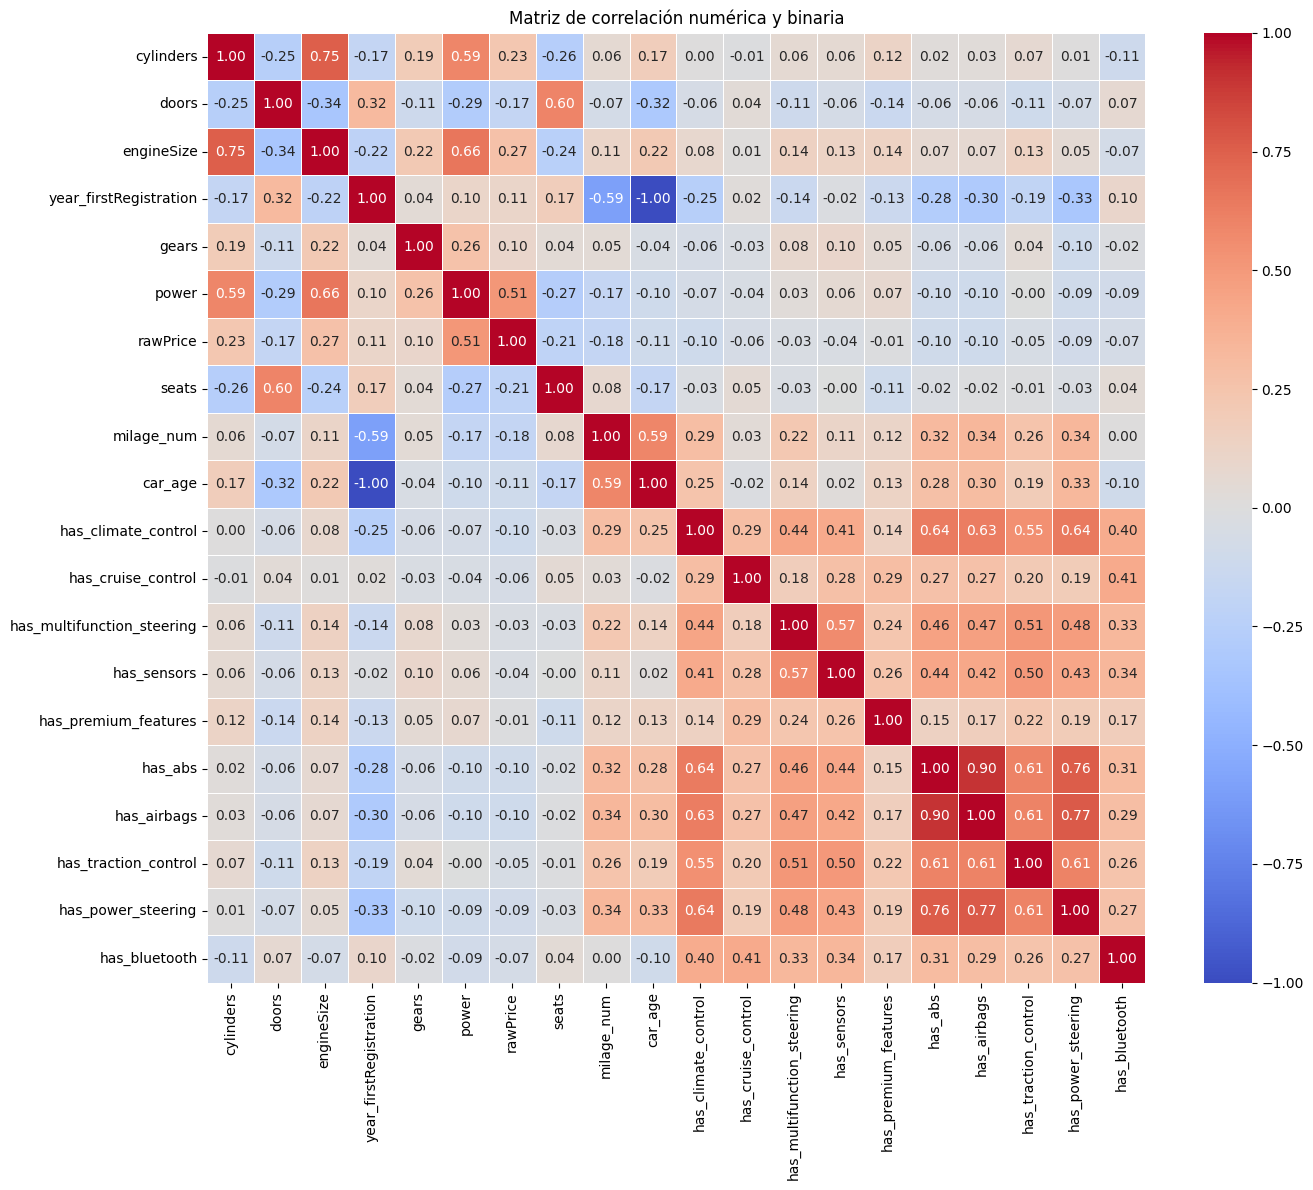

In [ ]:
# === CÓDIGO COMPLETO COLAB ===

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np

# === CARGA DEL DATASET ACTUALIZADO ===
ruta = '/content/autoscout24_dataset_limpio_def.xlsx'  # actualiza si el nombre final es distinto
df = pd.read_excel(ruta)

# === VARIABLES DEFINITIVAS ===
variables = [
    'bodyType', 'colour', 'cylinders', 'doors', 'drivetrain', 'engineSize',
    'year_firstRegistration', 'gearbox', 'gears', 'location', 'mark', 'power',
    'rawPrice', 'seats', 'seller', 'state', 'milage_num', 'car_age',
    'fuelType_simplified', 'has_climate_control', 'has_cruise_control',
    'has_multifunction_steering', 'has_sensors', 'has_premium_features',
    'has_abs', 'has_airbags', 'has_traction_control', 'has_power_steering',
    'has_bluetooth', 'brand', 'model_detail'
]

# === 1. CORRELACIONES NUMÉRICAS CON rawPrice ===
numericas = df[variables].select_dtypes(include=['int64', 'float64'])
correlaciones = numericas.corr()['rawPrice'].drop('rawPrice').sort_values(ascending=False)

# Mostrar tabla
print("📊 Correlaciones numéricas y binarias con rawPrice:")
display(correlaciones)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=correlaciones.values, y=correlaciones.index, palette='viridis')
plt.title("Correlación numérica/binaria con rawPrice")
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()

# === 2. ANOVA DE VARIABLES CATEGÓRICAS ===
categoricas = [var for var in variables if df[var].dtype == 'object']
anova_resultados = []

for var in categoricas:
    try:
        grupos = [df[df[var] == cat]['rawPrice'].dropna() for cat in df[var].dropna().unique()]
        if len(grupos) >= 2:
            stat, p = f_oneway(*grupos)
            anova_resultados.append({'Variable': var, 'p-valor': p})
    except Exception as e:
        print(f"Error con {var}: {e}")

anova_df = pd.DataFrame(anova_resultados).sort_values(by='p-valor')

# Mostrar tabla
print("🧪 ANOVA (categorical variables vs rawPrice):")
display(anova_df)

# Gráfico ANOVA
anova_plot = anova_df[anova_df['p-valor'] < 0.05]
plt.figure(figsize=(10,6))
sns.barplot(x=-np.log10(anova_plot['p-valor']), y=anova_plot['Variable'], palette='magma')
plt.title("Significancia de variables categóricas según ANOVA (-log10 p-valor)")
plt.xlabel("-log10(p-valor)")
plt.tight_layout()
plt.show()

# === 3. MATRIZ DE CORRELACIÓN COMPLETA (heatmap) ===
plt.figure(figsize=(14,12))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación numérica y binaria")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# === CARGAR DATASET ===
ruta = '/content/autoscout24_dataset_limpio_def.xlsx'  # ajusta si es distinto
df = pd.read_excel(ruta)

# === FUNCIÓN PARA CALCULAR ETIQUETA AMBIENTAL ===
def asignar_etiqueta(row):
    year = row['year_firstRegistration']
    fuel = row['fuelType_simplified'].lower()

    if fuel == 'gasoline':
        if year >= 2006:
            return 'C'
        elif year >= 2001:
            return 'B'
        else:
            return 'Sin etiqueta'
    elif fuel == 'diesel':
        if year >= 2015:
            return 'C'
        elif year >= 2006:
            return 'B'
        else:
            return 'Sin etiqueta'
    elif fuel in ['hybrid', 'electric/gasoline', 'electric']:
        return 'ECO'
    else:
        return 'Sin etiqueta'

# === APLICAR A TODOS LOS COCHES ===
df['env_label'] = df.apply(asignar_etiqueta, axis=1)

# === GUARDAR ARCHIVO CON ETIQUETA AÑADIDA ===
ruta_salida = '/content/autoscout24_dataset_con_etiqueta_dgt.xlsx'
df.to_excel(ruta_salida, index=False)

from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# === 1. CARGAR ARCHIVO ACTUAL CON LA COLUMNA 'model_detail' ===
ruta_entrada = '/content/autoscout24_dataset_limpio_def.xlsx'  # actualiza si cambia
df = pd.read_excel(ruta_entrada)

# === 2. ANALIZAR LOS COCHES CON model_detail VACÍO ===
model_nulos = df['model_detail'].isnull().sum()
model_vacios = (df['model_detail'].astype(str).str.strip() == '').sum()

print(f"🔍 Coches con model_detail nulo: {model_nulos}")
print(f"🔍 Coches con model_detail vacío (texto en blanco): {model_vacios}")
print(f"🔍 Total a eliminar: {model_nulos + model_vacios}")

# === 3. ELIMINAR COCHES SIN model_detail ===
df = df[~df['model_detail'].isnull()]
df = df[df['model_detail'].astype(str).str.strip() != '']

# === 4. GUARDAR Y DESCARGAR NUEVO ARCHIVO ===
ruta_salida = '/content/autoscout24_dataset_sin_model_detail_vacio.xlsx'
df.to_excel(ruta_salida, index=False)

from google.colab import files
files.download(ruta_salida)


🔍 Coches con model_detail nulo: 74
🔍 Coches con model_detail vacío (texto en blanco): 0
🔍 Total a eliminar: 74


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📊 Correlación entre env_label_score y rawPrice: 0.108
🧪 ANOVA env_label vs rawPrice → p-valor: 1.07699e-21


<ipython-input-3-ae42fccc01e6>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='env_label', y='rawPrice', order=['Sin etiqueta','B','C','ECO','0'], palette='Set3')


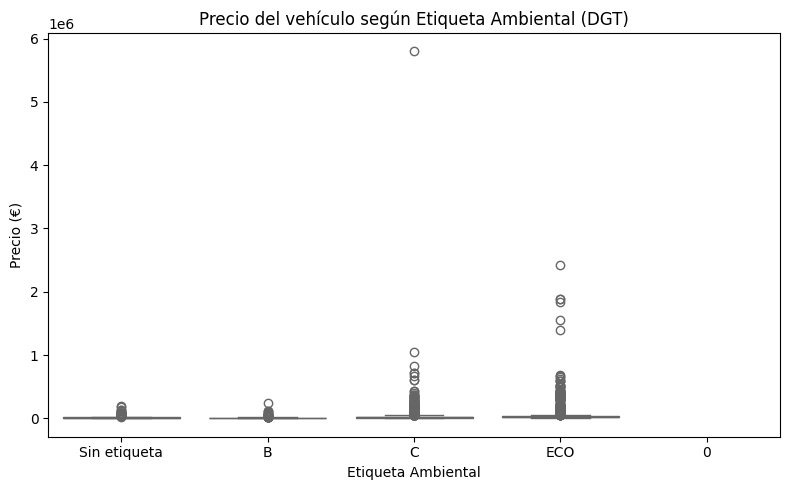

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. MAPEAR ENV_LABEL COMO VARIABLE ORDINAL ===
env_label_ordinal = {
    'Sin etiqueta': 0,
    'B': 1,
    'C': 2,
    'ECO': 3,
    '0': 4
}
df['env_label_score'] = df['env_label'].map(env_label_ordinal)

# === 2. CORRELACIÓN CON rawPrice ===
correlacion = df[['env_label_score', 'rawPrice']].corr().iloc[0, 1]
print(f"📊 Correlación entre env_label_score y rawPrice: {round(correlacion, 3)}")

# === 3. ANOVA (Categoría original vs. rawPrice) ===
grupos = [df[df['env_label'] == cat]['rawPrice'].dropna() for cat in df['env_label'].dropna().unique()]
stat, p_valor = f_oneway(*grupos)
print(f"🧪 ANOVA env_label vs rawPrice → p-valor: {p_valor:.5e}")

# === 4. GRÁFICO BOXPLOT ===
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='env_label', y='rawPrice', order=['Sin etiqueta','B','C','ECO','0'], palette='Set3')
plt.title('Precio del vehículo según Etiqueta Ambiental (DGT)')
plt.xlabel('Etiqueta Ambiental')
plt.ylabel('Precio (€)')
plt.tight_layout()
plt.show()


In [ ]:
# === GUARDAR DATASET ACTUALIZADO CON env_label_score ===
ruta_salida = '/content/autoscout24_dataset_con_env_label_score.xlsx'
df.to_excel(ruta_salida, index=False)

from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Cargar dataset original
df = pd.read_excel('/content/autoscout24_dataset_limpio_def.xlsx')  # ajusta ruta si es distinta

# === FUNCIONES ===
def eliminar_outliers_percentil(df, columna, p_inf=0.01, p_sup=0.99):
    q_low = df[columna].quantile(p_inf)
    q_high = df[columna].quantile(p_sup)
    print(f"✅ Para '{columna}': Rango aceptado [{q_low:.2f}, {q_high:.2f}]")
    return df[(df[columna] >= q_low) & (df[columna] <= q_high)]

# === LIMPIEZA VARIABLES NUMÉRICAS ===

# 1. Precio - rawPrice
df = eliminar_outliers_percentil(df, 'rawPrice', p_inf=0.01, p_sup=0.99)

# 2. Potencia - power
df = eliminar_outliers_percentil(df, 'power', p_inf=0.01, p_sup=0.99)

# 3. Tamaño motor - engineSize
df = eliminar_outliers_percentil(df, 'engineSize', p_inf=0.01, p_sup=0.99)

# 4. Kilometraje - milage_num
df = eliminar_outliers_percentil(df, 'milage_num', p_inf=0.01, p_sup=0.99)

# 5. Antigüedad - car_age
df = eliminar_outliers_percentil(df, 'car_age', p_inf=0.01, p_sup=0.99)

# === GUARDAR NUEVO DATASET LIMPIO ===
ruta_salida = '/content/TFG_COCHES_outliers_limpiados.xlsx'
df.to_excel(ruta_salida, index=False)

print("🎯 Dataset limpio y guardado con outliers eliminados.")

from google.colab import files
files.download(ruta_salida)

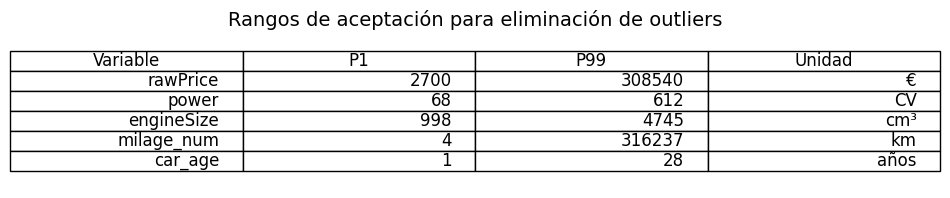

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame resumen
outliers_info = {
    'Variable': ['rawPrice', 'power', 'engineSize', 'milage_num', 'car_age'],
    'P1': [2700, 68, 998, 4, 1],
    'P99': [308540, 612, 4745, 316237, 28],
    'Unidad': ['€', 'CV', 'cm³', 'km', 'años']
}

df_outliers = pd.DataFrame(outliers_info)

# Visualizar tabla como gráfico
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('tight')
ax.axis('off')
tabla = ax.table(cellText=df_outliers.values, colLabels=df_outliers.columns, loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)

plt.title("Rangos de aceptación para eliminación de outliers", fontsize=14)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# === 1. Cargar dataset original ===
df = pd.read_excel('/content/autoscout24_dataset_limpio_def.xlsx')

# === 2. Eliminar columnas no útiles ===
df = df.drop(columns=[
    'model_detail', 'location', 'mark', 'year_firstRegistration', 'env_label'
])

# === 3. Agrupar marcas: top 20 + "Other" ===
top_20_marcas = df['brand'].value_counts().nlargest(20).index
df['brand_grouped'] = df['brand'].apply(lambda x: x if x in top_20_marcas else 'Other')
df = df.drop(columns=['brand'])

# === 4. One-Hot Encoding sin eliminar ninguna categoría ===
cat_vars = [
    'bodyType', 'colour', 'drivetrain', 'gearbox',
    'seller', 'state', 'fuelType_simplified',
    'car_range', 'brand_grouped'
]
df = pd.get_dummies(df, columns=cat_vars, drop_first=False)

# === 5. Normalizar variables numéricas ===
num_vars = ['cylinders', 'doors', 'engineSize', 'gears', 'power', 'seats', 'milage_num', 'car_age']
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

# === 6. Asegurar que booleanos están como enteros ===
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

# === 7. Separar X e y si se desea
X = df.drop(columns=['rawPrice'])
y = df['rawPrice']

# === 8. Guardar dataset final para modelado avanzado ===
ruta_salida = '/content/dataset_modelado_final_completo.xlsx'
df.to_excel(ruta_salida, index=False)

# === 9. Descargar archivo desde Colab ===
from google.colab import files
files.download(ruta_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# === CARGAR EL ARCHIVO (ajusta si el nombre es distinto) ===
df = pd.read_excel('/content/autoscout24_dataset_limpio_def.xlsx')

# === SELECCIONAR VARIABLES NUMÉRICAS RELEVANTES ===
variables_numericas = [
    'rawPrice', 'power', 'engineSize', 'milage_num', 'car_age',
    'cylinders', 'doors', 'gears', 'seats', 'env_label_score'
]

# === CALCULAR MEDIDAS DE TENDENCIA CENTRAL ===
medidas = pd.DataFrame(index=variables_numericas)
medidas['Media'] = df[variables_numericas].mean()
medidas['Mediana'] = df[variables_numericas].median()
medidas['Moda'] = df[variables_numericas].mode().iloc[0]

# === MOSTRAR TABLA DE MEDIDAS DE TENDENCIA CENTRAL ===
medidas.reset_index(inplace=True)
medidas.rename(columns={'index': 'Variable'}, inplace=True)
print(medidas.to_string(index=False))


       Variable        Media  Mediana     Moda
       rawPrice 23074.167709  17490.0  12990.0
          power   177.057703    150.0    150.0
     engineSize  1841.661455   1598.0   1598.0
     milage_num 95758.605742  84515.0 140000.0
        car_age     7.523024      6.0      5.0
      cylinders     4.198408      4.0      4.0
          doors     4.399943      5.0      5.0
          gears     5.783826      6.0      6.0
          seats     4.852331      5.0      5.0
env_label_score     2.115549      2.0      2.0


In [ ]:
import pandas as pd


# Variables numéricas
variables_numericas = [
    'rawPrice', 'power', 'engineSize', 'milage_num', 'car_age',
    'cylinders', 'doors', 'gears', 'seats', 'env_label_score'
]

# Calcular dispersión
dispersión = pd.DataFrame(index=variables_numericas)
dispersión['Rango'] = df[variables_numericas].max() - df[variables_numericas].min()
dispersión['Desviación estándar'] = df[variables_numericas].std()
dispersión['Varianza'] = df[variables_numericas].var()

# Mostrar tabla
dispersión.reset_index(inplace=True)
dispersión.rename(columns={'index': 'Variable'}, inplace=True)
print(dispersión.to_string(index=False))


       Variable    Rango  Desviación estándar     Varianza
       rawPrice 287200.0         21644.647237 4.684908e+08
          power    544.0            91.237628 8.324305e+03
     engineSize   3702.0           606.020331 3.672606e+05
     milage_num 315488.0         66939.075729 4.480840e+09
        car_age     27.0             5.478903 3.001838e+01
      cylinders      6.0             0.846836 7.171318e-01
          doors      6.0             1.082691 1.172219e+00
          gears      9.0             1.964294 3.858451e+00
          seats      8.0             0.739924 5.474871e-01
env_label_score      3.0             0.712071 5.070446e-01


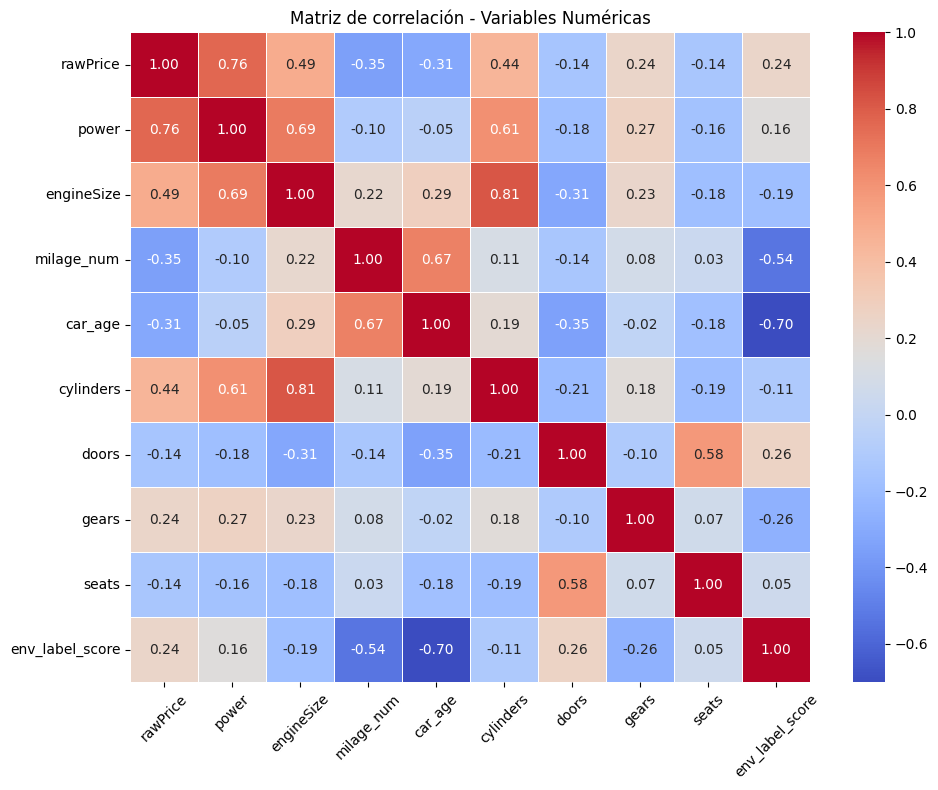

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset modelado final
df = pd.read_excel('/content/dataset_modelado_final .xlsx')

# Variables numéricas
numericas = [
    'rawPrice', 'power', 'engineSize', 'milage_num', 'car_age',
    'cylinders', 'doors', 'gears', 'seats', 'env_label_score'
]

# Calcular y mostrar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación - Variables Numéricas")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# === 1. Cargar el dataset con todas las variables binarias ===
df = pd.read_excel('/content/dataset_modelado_final_completo.xlsx')  # Ajusta si tu archivo tiene otro nombre

# === 2. Seleccionar solo variables binarias ===
# Consideramos binarias aquellas columnas con solo dos valores únicos (0 y 1)
variables_binarias = [col for col in df.columns
                      if df[col].dropna().nunique() == 2 and col != 'rawPrice']

# === 3. Calcular correlaciones con rawPrice ===
correlaciones_binarias = df[variables_binarias + ['rawPrice']].corr()['rawPrice'].drop('rawPrice')

# === 4. Mostrar top 10 positivas y negativas ===
top_positivas = correlaciones_binarias.sort_values(ascending=False).head(10)
top_negativas = correlaciones_binarias.sort_values().head(10)

# === 5. Mostrar resultados
print("📈 Top 10 variables binarias más correlacionadas positivamente con el precio:")
print(top_positivas)

print("\n📉 Top 10 variables binarias más correlacionadas negativamente con el precio:")
print(top_negativas)



📈 Top 10 variables binarias más correlacionadas positivamente con el precio:
car_range_premium              0.557552
brand_grouped_Porsche          0.485785
gearbox_Automatic              0.380038
drivetrain_4WD                 0.376734
bodyType_Coupe                 0.372507
brand_grouped_Mercedes-Benz    0.167771
fuelType_simplified_Hybrid     0.149720
car_range_mid-range            0.092051
drivetrain_Rear                0.088976
brand_grouped_Audi             0.058156
Name: rawPrice, dtype: float64

📉 Top 10 variables binarias más correlacionadas negativamente con el precio:
gearbox_Manual               -0.379373
drivetrain_Front             -0.332907
car_range_low-cost           -0.323245
has_power_steering           -0.172142
has_airbags                  -0.160465
bodyType_Van                 -0.160150
bodyType_Compact             -0.159974
has_abs                      -0.157437
has_climate_control          -0.155930
fuelType_simplified_Diesel   -0.145223
Name: rawPrice, dtype: f

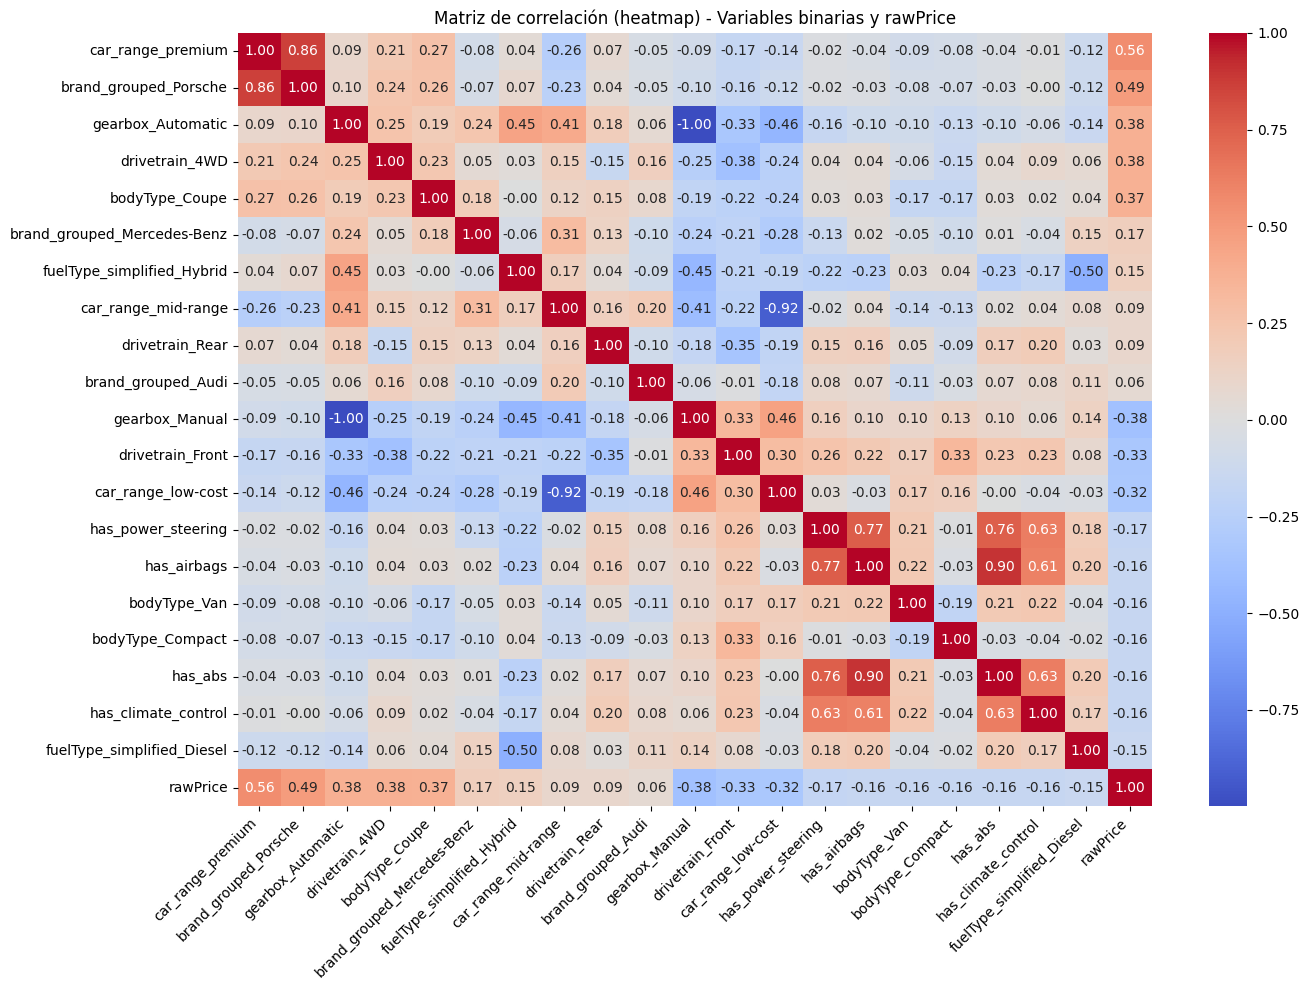

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === 2. Seleccionar variables binarias relevantes ===
# Lista de las 20 variables más correlacionadas (positiva + negativa)
vars_corr_binarias = [
    'car_range_premium', 'brand_grouped_Porsche', 'gearbox_Automatic', 'drivetrain_4WD',
    'bodyType_Coupe', 'brand_grouped_Mercedes-Benz', 'fuelType_simplified_Hybrid',
    'car_range_mid-range', 'drivetrain_Rear', 'brand_grouped_Audi',
    'gearbox_Manual', 'drivetrain_Front', 'car_range_low-cost', 'has_power_steering',
    'has_airbags', 'bodyType_Van', 'bodyType_Compact', 'has_abs',
    'has_climate_control', 'fuelType_simplified_Diesel', 'rawPrice'
]

# === 3. Calcular la matriz de correlación ===
corr_bin = df[vars_corr_binarias].corr()

# === 4. Crear heatmap con anotaciones
plt.figure(figsize=(14, 10))
sns.heatmap(corr_bin, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación (heatmap) - Variables binarias y rawPrice')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Obtener correlación de todas las variables con rawPrice
correlaciones_con_precio = correlation_matrix['rawPrice'].drop('rawPrice').sort_values(ascending=False)

# Mostrar las más altas
print("🔎 Variables más correlacionadas positivamente con el precio:")
display(correlaciones_con_precio.head(20))

print("\n🔎 Variables más correlacionadas negativamente con el precio:")
display(correlaciones_con_precio.tail(20))


🔎 Variables más correlacionadas positivamente con el precio:


power                          0.764187
car_range_premium              0.557552
engineSize                     0.492010
brand_grouped_Porsche          0.485785
cylinders                      0.442257
bodyType_Coupe                 0.372507
env_label_score                0.241598
gears                          0.239702
brand_grouped_Mercedes-Benz    0.167771
fuelType_simplified_Hybrid     0.149720
car_range_mid-range            0.092051
drivetrain_Rear                0.088976
brand_grouped_BMW              0.058002
state_Pre-registered           0.057683
brand_grouped_Lexus            0.055525
colour_Grey                    0.045606
bodyType_Off-Road/Pick-up      0.035530
colour_Black                   0.034299
has_sensors                    0.031369
colour_Green                   0.025852
Name: rawPrice, dtype: float64


🔎 Variables más correlacionadas negativamente con el precio:


bodyType_Station wagon     -0.073684
colour_White               -0.076049
brand_grouped_SEAT         -0.076761
brand_grouped_Volkswagen   -0.079954
has_traction_control       -0.084592
brand_grouped_Renault      -0.090485
brand_grouped_Opel         -0.096694
brand_grouped_Citroen      -0.103966
seats                      -0.136348
brand_grouped_Peugeot      -0.138063
doors                      -0.142308
has_climate_control        -0.155930
has_abs                    -0.157437
bodyType_Van               -0.160150
has_airbags                -0.160465
has_power_steering         -0.172142
car_age                    -0.308743
drivetrain_Front           -0.332907
milage_num                 -0.354197
gearbox_Manual             -0.379373
Name: rawPrice, dtype: float64

Saving autoscout24_dataset_limpio_def.xlsx to autoscout24_dataset_limpio_def (1).xlsx


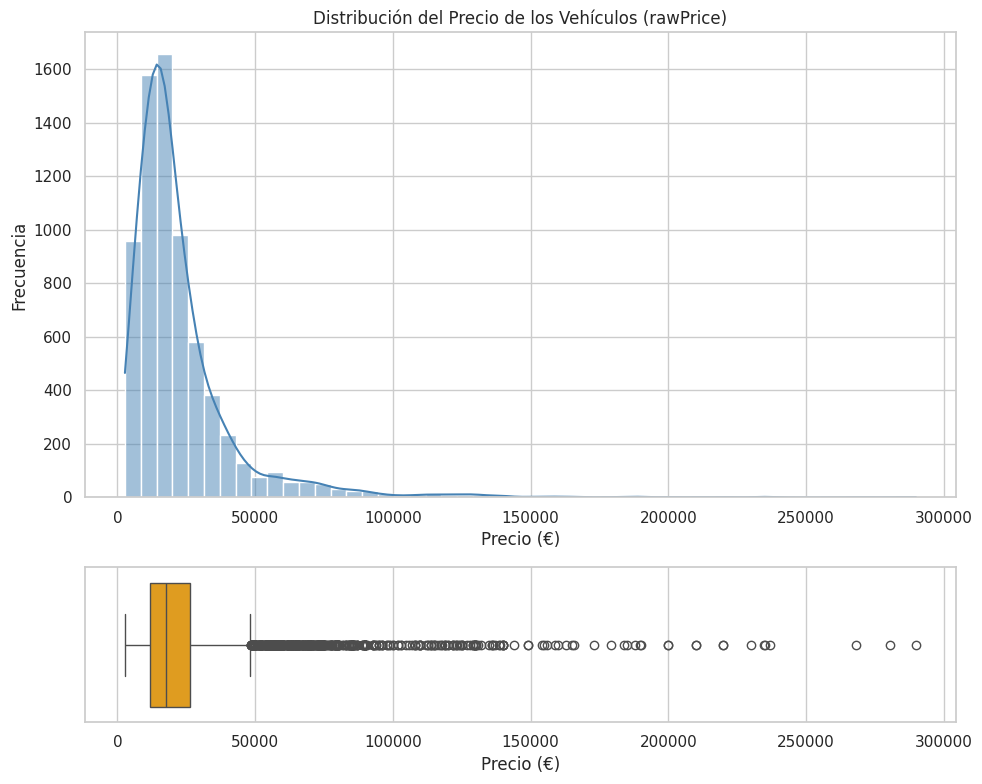

In [ ]:
# Paso 1: Subir el archivo desde tu ordenador
from google.colab import files
uploaded = files.upload()

# Paso 2: Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 3: Cargar el dataset (asegúrate de escribir bien el nombre del archivo subido)
df = pd.read_excel('autoscout24_dataset_limpio_def.xlsx')  # Cambia si el nombre es diferente

# Paso 4: Estilo de gráficos
sns.set(style="whitegrid")

# Paso 5: Crear figura con histograma + KDE y boxplot del precio
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Histograma con KDE
sns.histplot(df['rawPrice'], kde=True, ax=axes[0], color='steelblue', bins=50)
axes[0].set_title('Distribución del Precio de los Vehículos (rawPrice)')
axes[0].set_xlabel('Precio (€)')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=df['rawPrice'], ax=axes[1], color='orange')
axes[1].set_xlabel('Precio (€)')

plt.tight_layout()
plt.show()


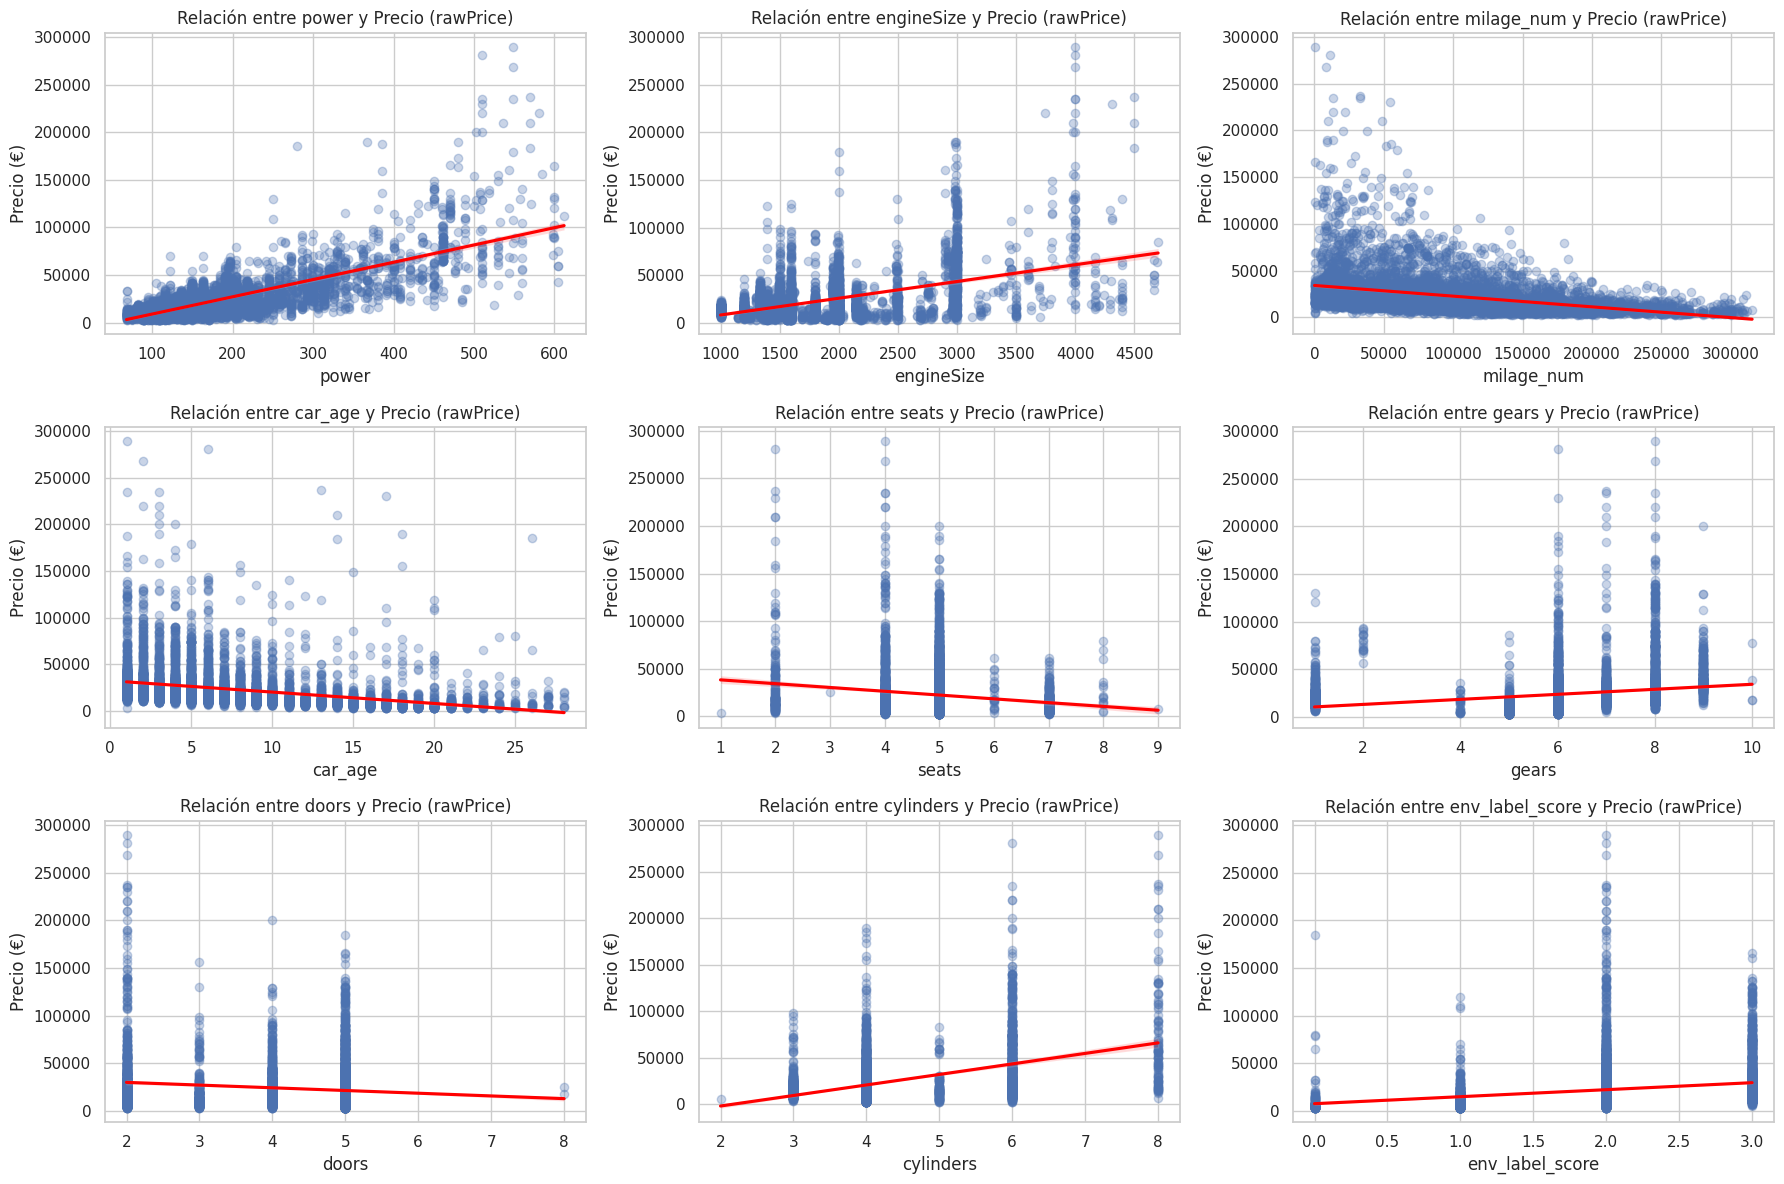

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas a analizar frente a rawPrice
vars_numericas = ['power', 'engineSize', 'milage_num', 'car_age', 'seats', 'gears', 'doors', 'cylinders', 'env_label_score']

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Scatter plots con línea de tendencia
for i, var in enumerate(vars_numericas):
    sns.regplot(data=df, x=var, y='rawPrice', ax=axes[i], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[i].set_title(f'Relación entre {var} y Precio (rawPrice)')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Precio (€)')

plt.tight_layout()
plt.show()


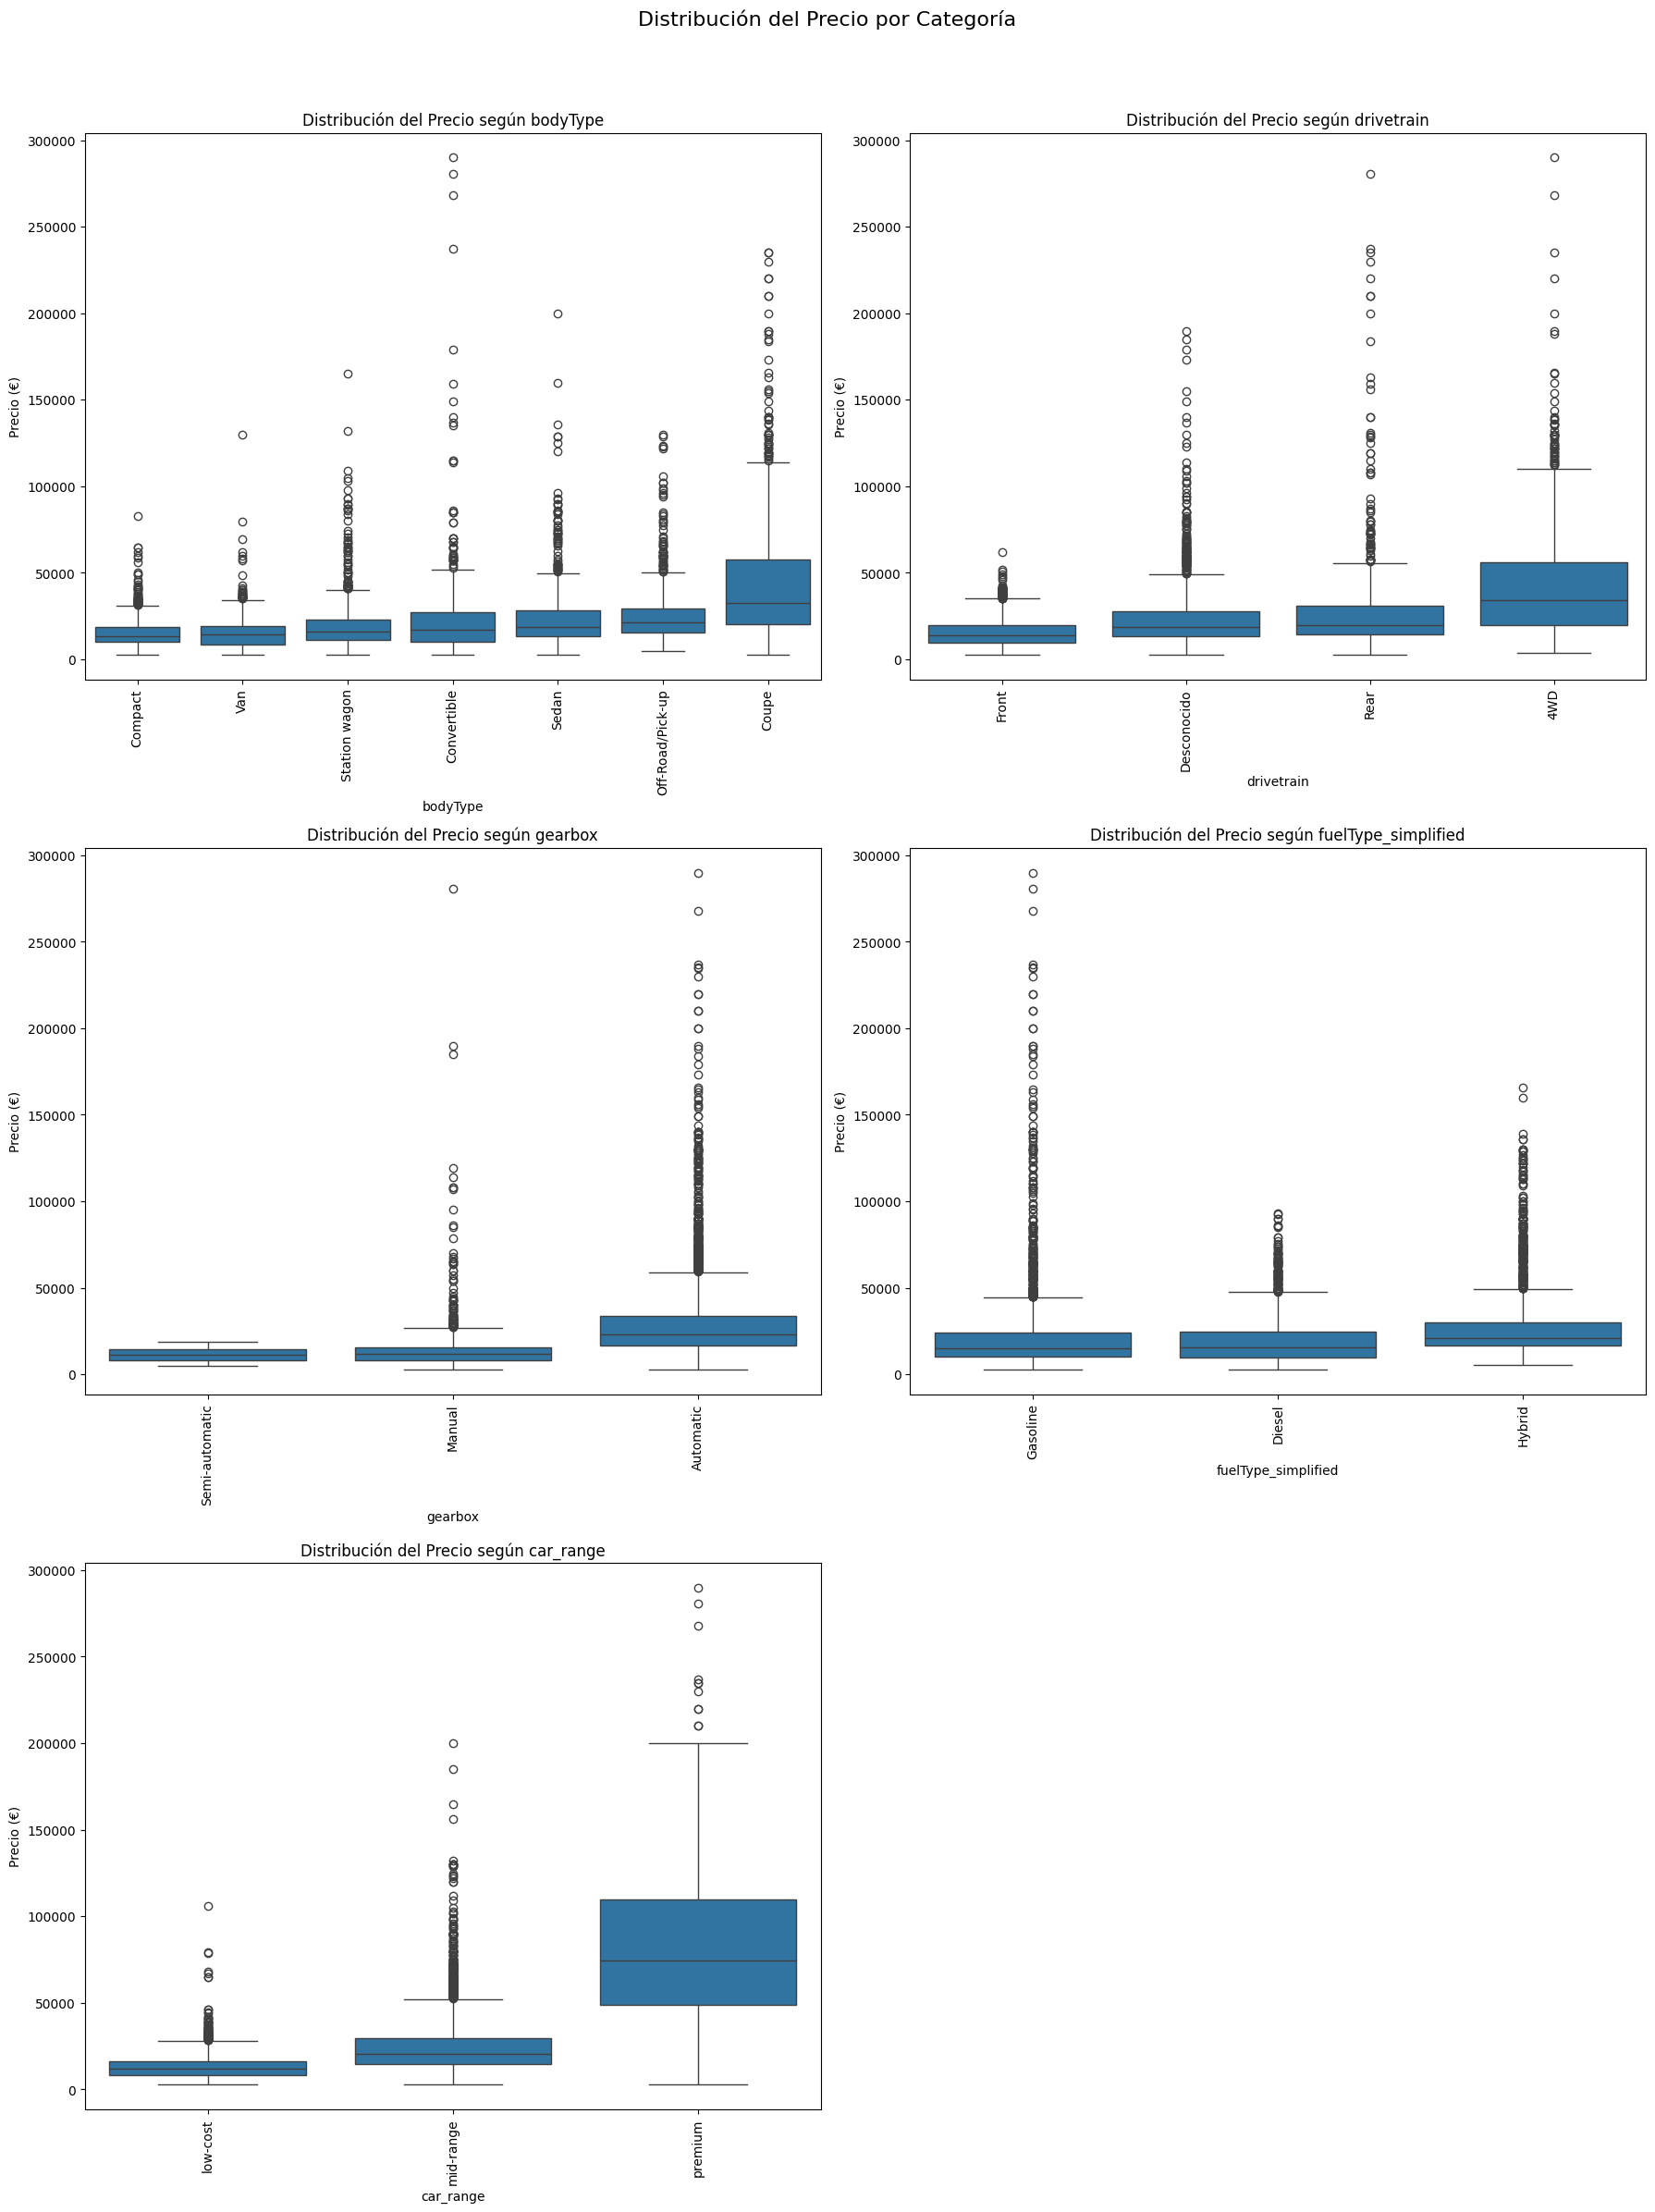

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# === CARGAR DATASET ===
df = pd.read_excel('autoscout24_dataset_limpio_def.xlsx')

# === LISTA DE VARIABLES CATEGÓRICAS A ANALIZAR ===
categorical_vars = ['bodyType', 'drivetrain', 'gearbox', 'fuelType_simplified', 'car_range']

# === PLOT DE BOXPLOTS POR CATEGORÍA ===
plt.figure(figsize=(18, 30))
for i, var in enumerate(categorical_vars):
    plt.subplot(4, 2, i + 1)
    order = df.groupby(var)['rawPrice'].median().sort_values().index  # Orden por mediana
    sns.boxplot(data=df, x=var, y='rawPrice', order=order)
    plt.xticks(rotation=90)
    plt.title(f'Distribución del Precio según {var}', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Precio (€)')
    plt.tight_layout()

plt.suptitle('Distribución del Precio por Categoría', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


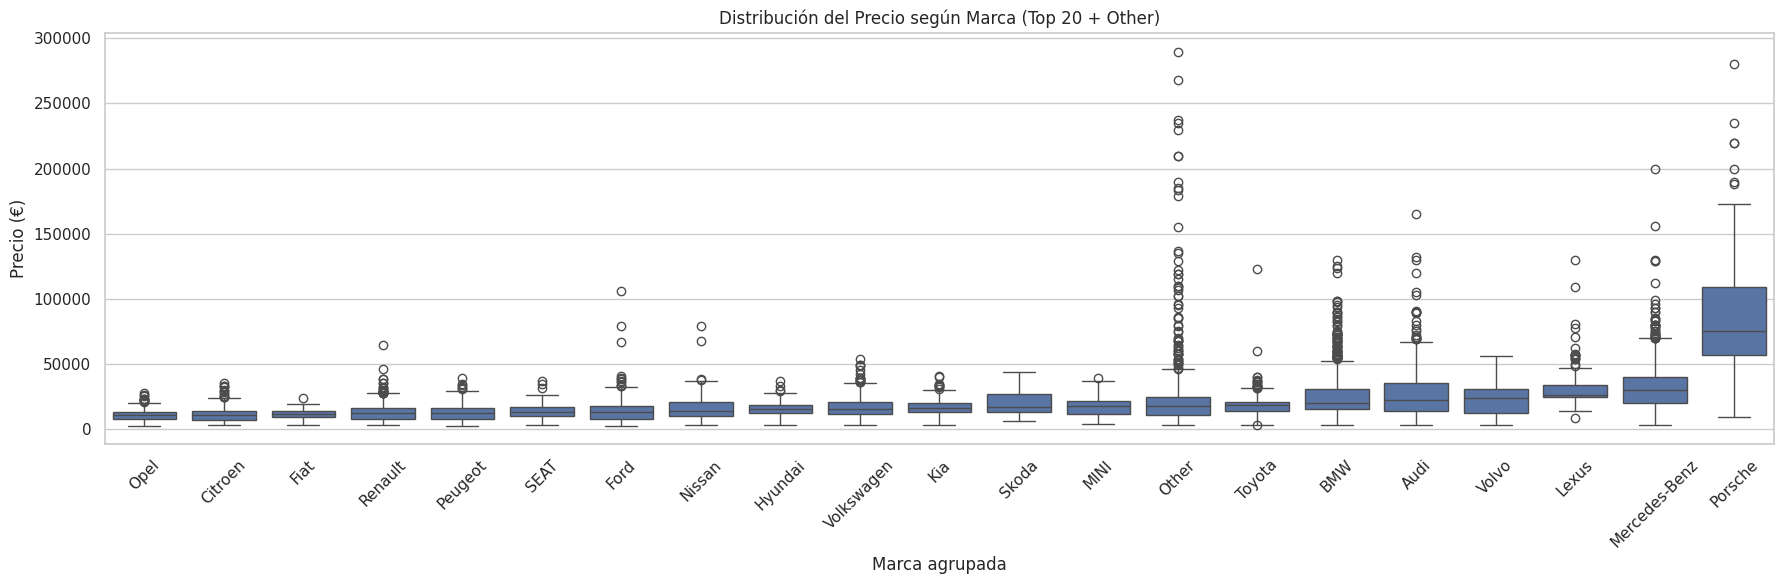

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar dataset original
df = pd.read_excel('autoscout24_dataset_limpio_def.xlsx')

# Agrupar marcas: Top 20 + Other
top_20_brands = df['brand'].value_counts().nlargest(20).index
df['brand_grouped'] = df['brand'].apply(lambda x: x if x in top_20_brands else 'Other')

# Gráfico boxplot para brand_grouped
plt.figure(figsize=(18, 6))
order = df.groupby('brand_grouped')['rawPrice'].median().sort_values().index
sns.boxplot(data=df, x='brand_grouped', y='rawPrice', order=order)
plt.xticks(rotation=45)
plt.title('Distribución del Precio según Marca (Top 20 + Other)')
plt.ylabel('Precio (€)')
plt.xlabel('Marca agrupada')
plt.tight_layout()
plt.show()


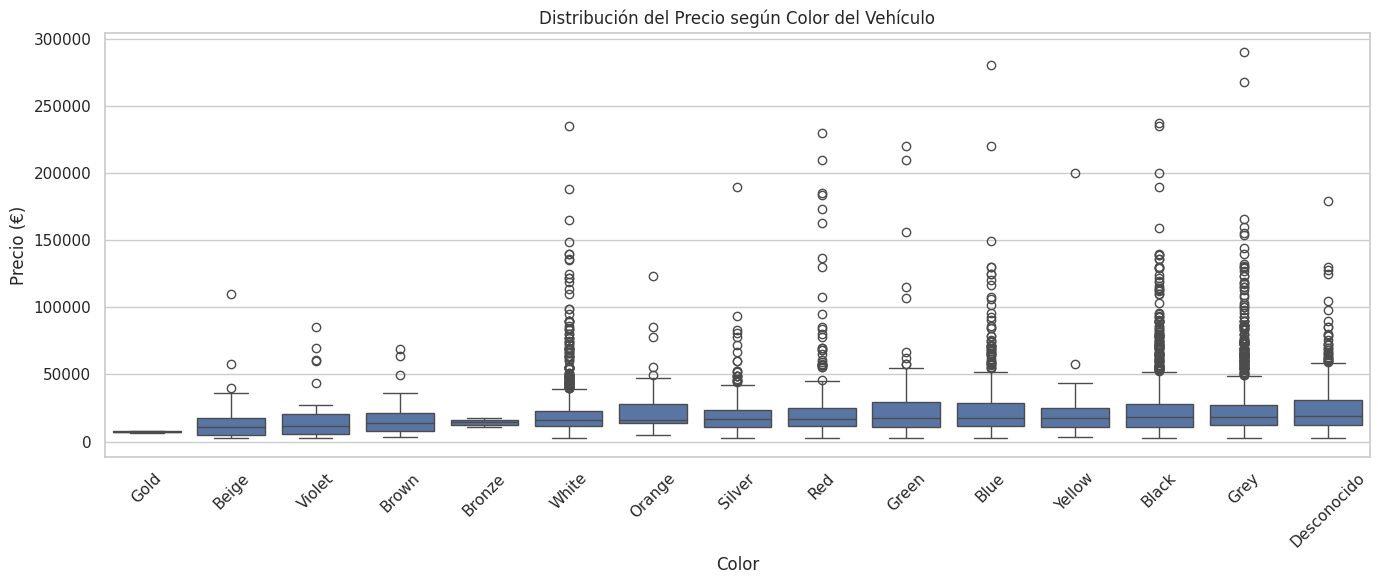

In [ ]:
# Gráfico boxplot para colour con buen tamaño
plt.figure(figsize=(14, 6))
order = df.groupby('colour')['rawPrice'].median().sort_values().index
sns.boxplot(data=df, x='colour', y='rawPrice', order=order)
plt.xticks(rotation=45)
plt.title('Distribución del Precio según Color del Vehículo')
plt.ylabel('Precio (€)')
plt.xlabel('Color')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# === Cargar dataset original ===
df = pd.read_excel('/content/autoscout24_dataset_limpio_def.xlsx')

# === Agrupar y calcular media del precio por variables categóricas ===
vars_categoricas = [
    'brand', 'bodyType', 'drivetrain', 'gearbox',
    'fuelType_simplified', 'car_range', 'colour'
]

medias_categoricas = {}
for var in vars_categoricas:
    medias_categoricas[var] = df.groupby(var)['rawPrice'].mean().sort_values(ascending=False)

# === Agrupar y calcular media del precio por variables numéricas ===
vars_numericas = [
    'power', 'engineSize', 'milage_num', 'car_age', 'gears',
    'seats', 'doors', 'cylinders', 'env_label_score'
]

medias_numericas = {}
for var in vars_numericas:
    medias_numericas[var] = df[[var, 'rawPrice']].groupby(var).mean().sort_values(by='rawPrice', ascending=False)


📊 Estadísticas de 'rawPrice':


count      7036.000000
mean      23074.167709
std       21644.647237
min        2700.000000
25%       11900.000000
50%       17490.000000
75%       26392.500000
max      289900.000000
Name: rawPrice, dtype: float64

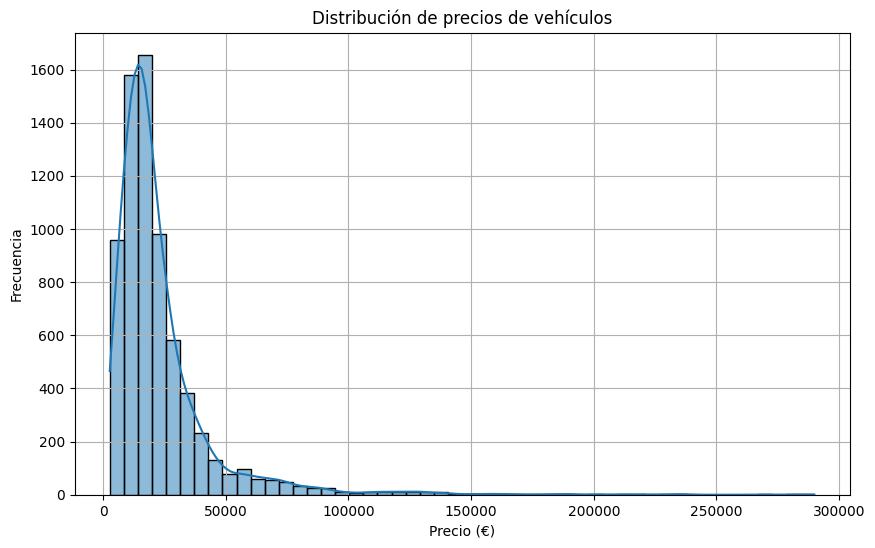

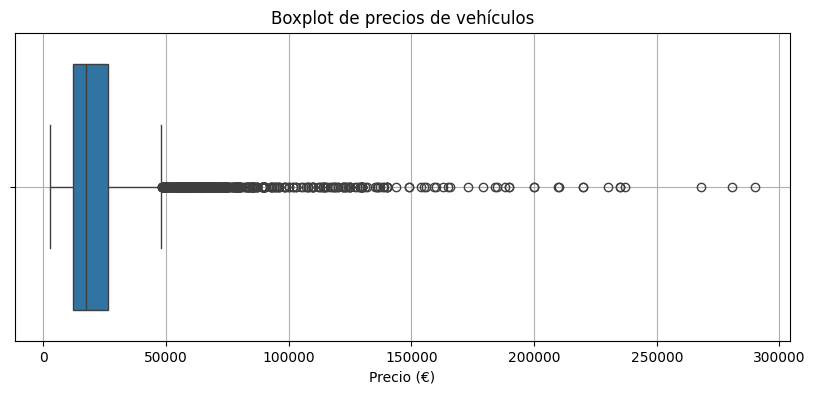

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar dataset ===
df = pd.read_excel('/content/autoscout24_dataset_limpio_def.xlsx')  # Ajusta ruta si es diferente

# === 2. Medidas de tendencia central y dispersión para rawPrice ===
print("📊 Estadísticas de 'rawPrice':")
display(df['rawPrice'].describe())

# === 3. Histograma de 'rawPrice' ===
plt.figure(figsize=(10,6))
sns.histplot(df['rawPrice'], bins=50, kde=True)
plt.title('Distribución de precios de vehículos')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# === 4. Boxplot de 'rawPrice' para detectar outliers ===
plt.figure(figsize=(10,4))
sns.boxplot(x=df['rawPrice'])
plt.title('Boxplot de precios de vehículos')
plt.xlabel('Precio (€)')
plt.grid(True)
plt.show()


📊 Estadísticas de 'power':


count    7036.000000
mean      177.057703
std        91.237628
min        68.000000
25%       120.000000
50%       150.000000
75%       200.000000
max       612.000000
Name: power, dtype: float64

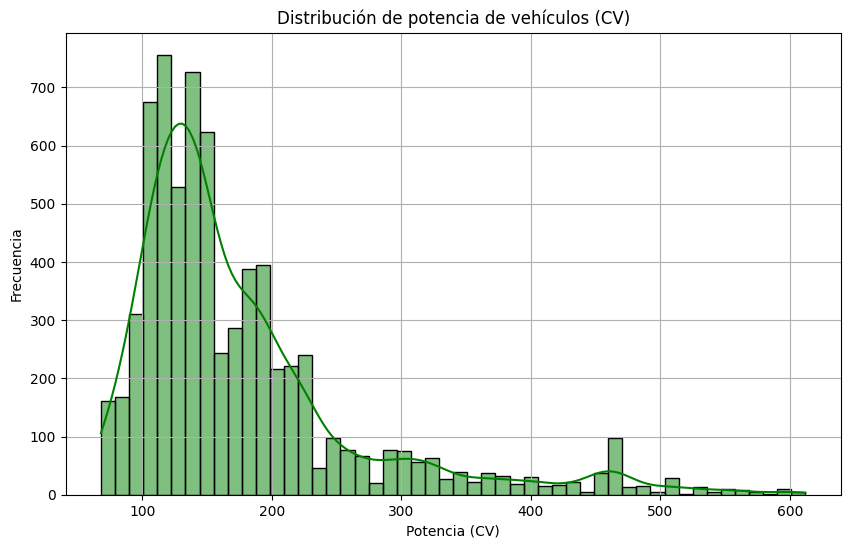

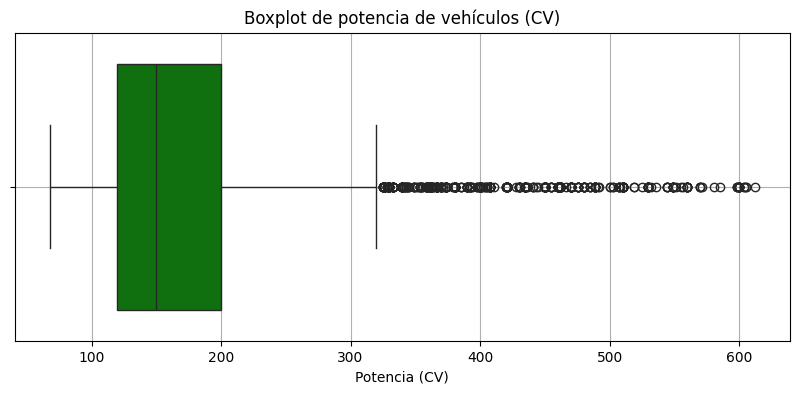

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# === 2. Medidas de tendencia central y dispersión para 'power' ===
print("📊 Estadísticas de 'power':")
display(df['power'].describe())

# === 3. Histograma de 'power' ===
plt.figure(figsize=(10,6))
sns.histplot(df['power'], bins=50, kde=True, color='green')
plt.title('Distribución de potencia de vehículos (CV)')
plt.xlabel('Potencia (CV)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# === 4. Boxplot de 'power' para detectar outliers ===
plt.figure(figsize=(10,4))
sns.boxplot(x=df['power'], color='green')
plt.title('Boxplot de potencia de vehículos (CV)')
plt.xlabel('Potencia (CV)')
plt.grid(True)
plt.show()


📊 Estadísticas de 'engineSize':


count    7036.000000
mean     1841.661455
std       606.020331
min       998.000000
25%      1496.000000
50%      1598.000000
75%      1995.000000
max      4700.000000
Name: engineSize, dtype: float64

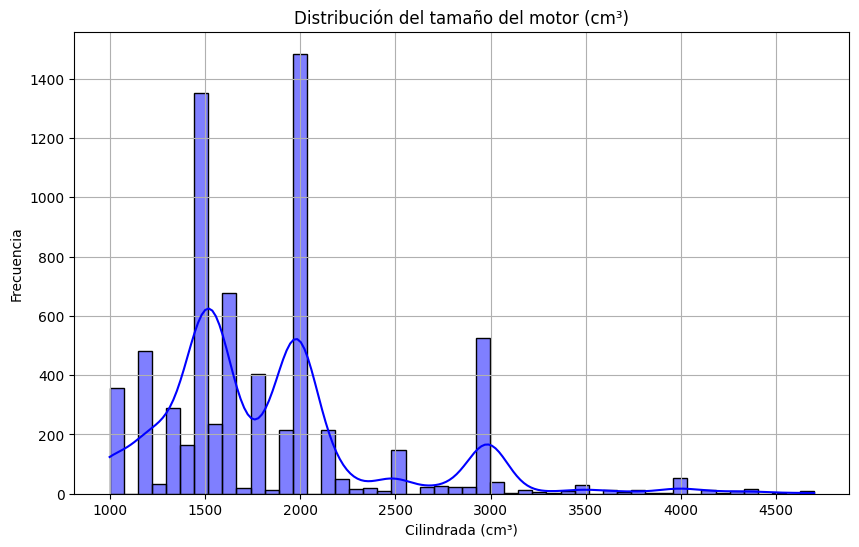

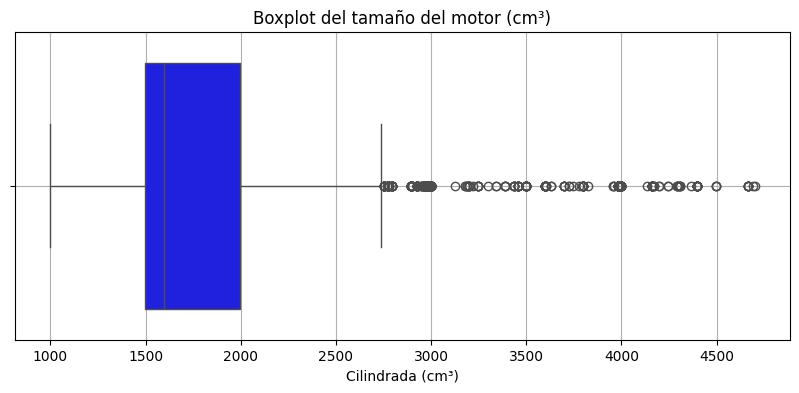

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# === 2. Medidas de tendencia central y dispersión para 'engineSize' ===
print("📊 Estadísticas de 'engineSize':")
display(df['engineSize'].describe())

# === 3. Histograma de 'engineSize' ===
plt.figure(figsize=(10,6))
sns.histplot(df['engineSize'], bins=50, kde=True, color='blue')
plt.title('Distribución del tamaño del motor (cm³)')
plt.xlabel('Cilindrada (cm³)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# === 4. Boxplot de 'engineSize' para detectar outliers ===
plt.figure(figsize=(10,4))
sns.boxplot(x=df['engineSize'], color='blue')
plt.title('Boxplot del tamaño del motor (cm³)')
plt.xlabel('Cilindrada (cm³)')
plt.grid(True)
plt.show()


📊 Estadísticas de 'milage_num':


count      7036.000000
mean      95758.605742
std       66939.075729
min           5.000000
25%       41998.000000
50%       84515.000000
75%      139000.000000
max      315493.000000
Name: milage_num, dtype: float64

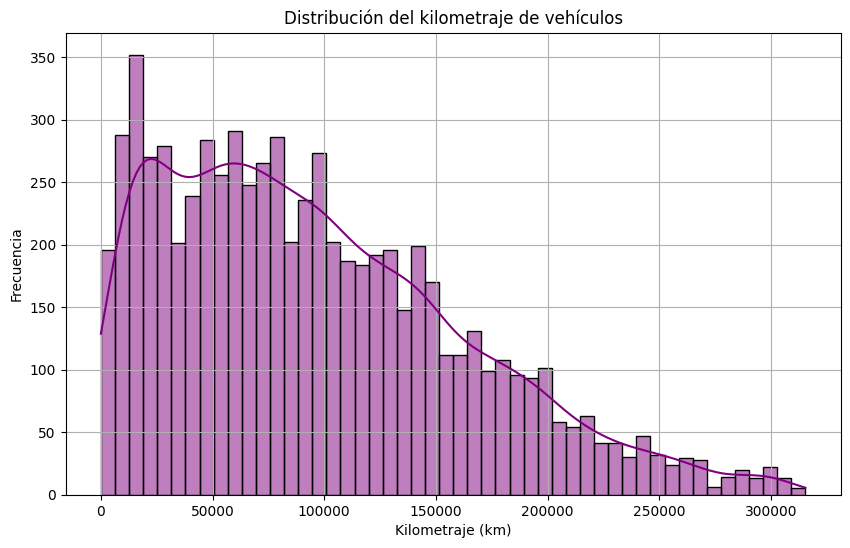

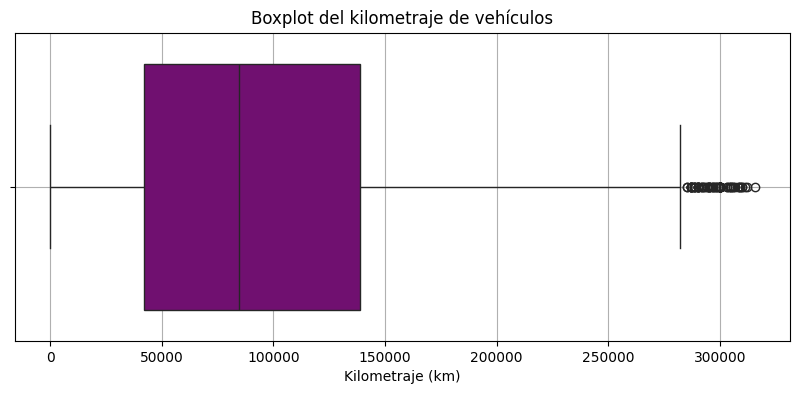

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# === 2. Medidas de tendencia central y dispersión para 'milage_num' ===
print("📊 Estadísticas de 'milage_num':")
display(df['milage_num'].describe())

# === 3. Histograma de 'milage_num' ===
plt.figure(figsize=(10,6))
sns.histplot(df['milage_num'], bins=50, kde=True, color='purple')
plt.title('Distribución del kilometraje de vehículos')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# === 4. Boxplot de 'milage_num' para detectar outliers ===
plt.figure(figsize=(10,4))
sns.boxplot(x=df['milage_num'], color='purple')
plt.title('Boxplot del kilometraje de vehículos')
plt.xlabel('Kilometraje (km)')
plt.grid(True)
plt.show()


📊 Estadísticas de 'car_age':


count    7036.000000
mean        7.523024
std         5.478903
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        28.000000
Name: car_age, dtype: float64

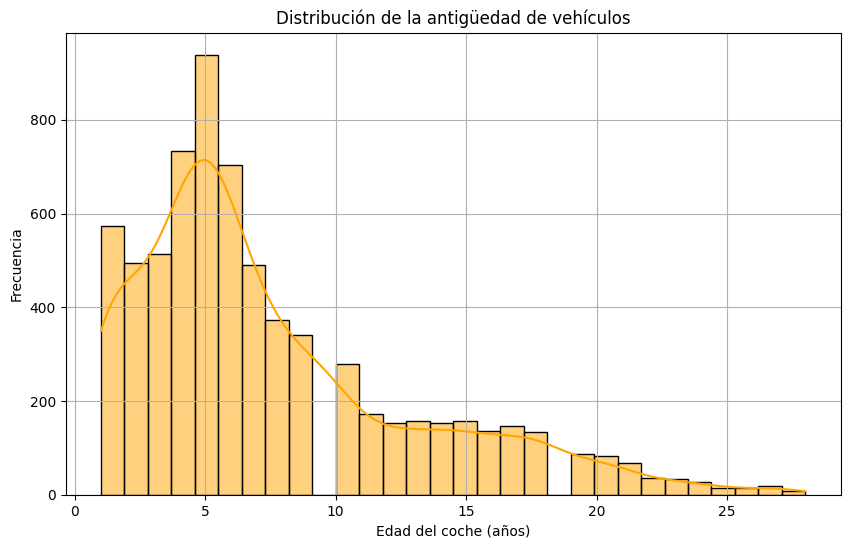

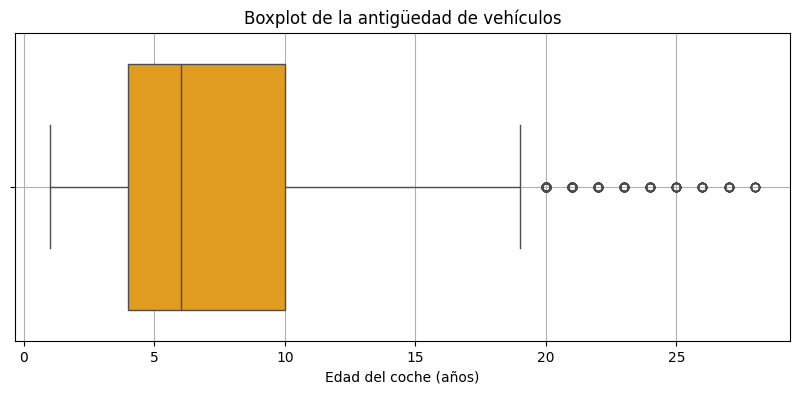

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# === 2. Medidas de tendencia central y dispersión para 'car_age' ===
print("📊 Estadísticas de 'car_age':")
display(df['car_age'].describe())

# === 3. Histograma de 'car_age' ===
plt.figure(figsize=(10,6))
sns.histplot(df['car_age'], bins=30, kde=True, color='orange')
plt.title('Distribución de la antigüedad de vehículos')
plt.xlabel('Edad del coche (años)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# === 4. Boxplot de 'car_age' para detectar outliers ===
plt.figure(figsize=(10,4))
sns.boxplot(x=df['car_age'], color='orange')
plt.title('Boxplot de la antigüedad de vehículos')
plt.xlabel('Edad del coche (años)')
plt.grid(True)
plt.show()


📊 Distribución de has_climate_control:


has_climate_control
1    57.3195
0    42.6805
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


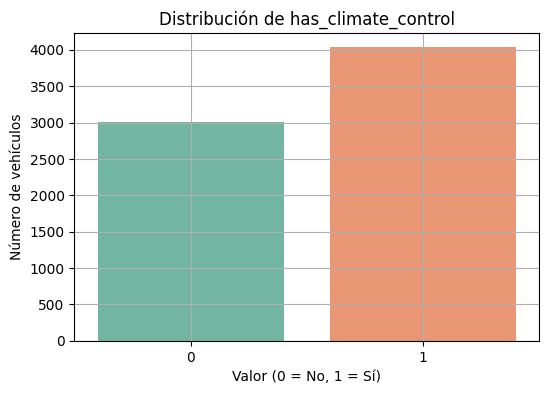

📊 Distribución de has_cruise_control:


has_cruise_control
0    74.72996
1    25.27004
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


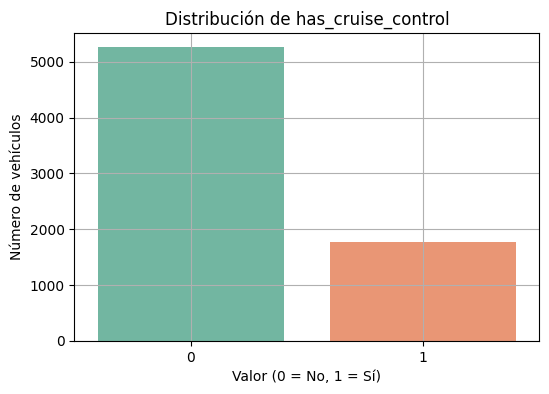

📊 Distribución de has_multifunction_steering:


has_multifunction_steering
0    69.840819
1    30.159181
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


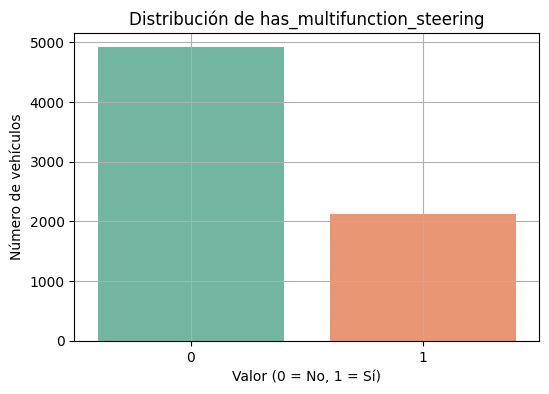

📊 Distribución de has_sensors:


has_sensors
0    71.887436
1    28.112564
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


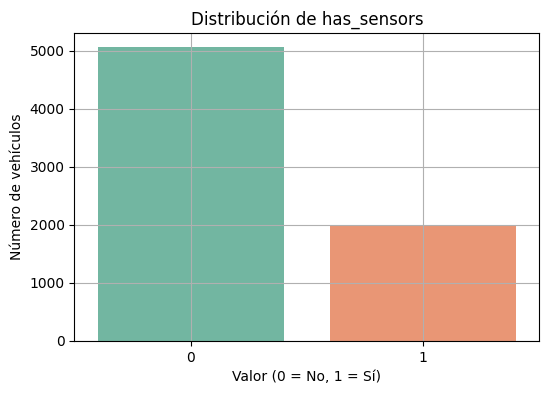

📊 Distribución de has_premium_features:


has_premium_features
0    95.33826
1     4.66174
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


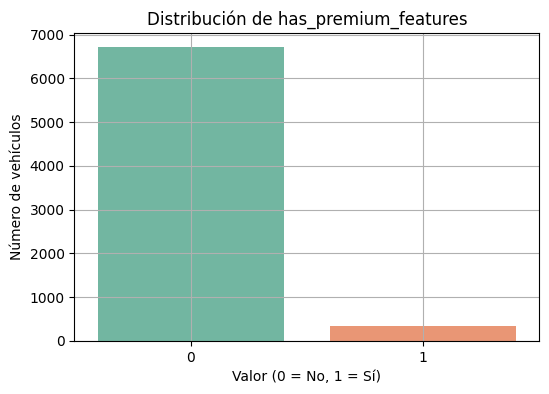

📊 Distribución de has_abs:


has_abs
1    61.49801
0    38.50199
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


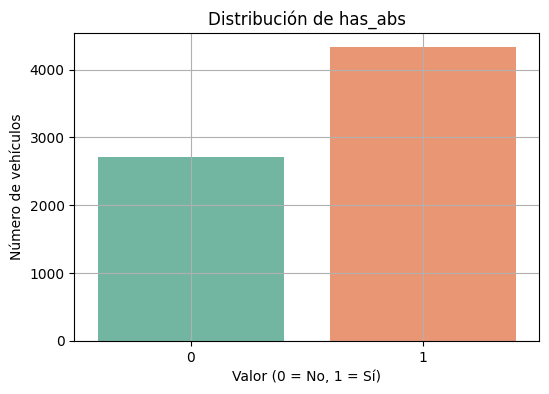

📊 Distribución de has_airbags:


has_airbags
1    61.256396
0    38.743604
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


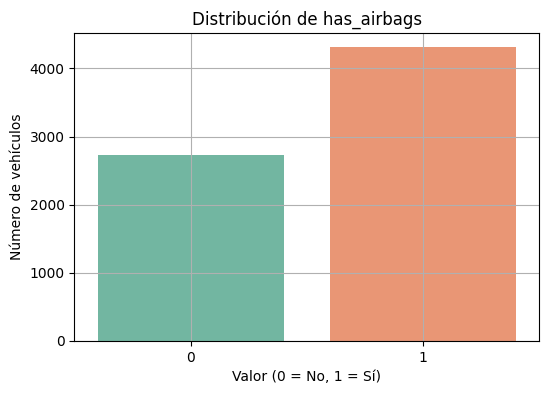

📊 Distribución de has_traction_control:


has_traction_control
0    59.351904
1    40.648096
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


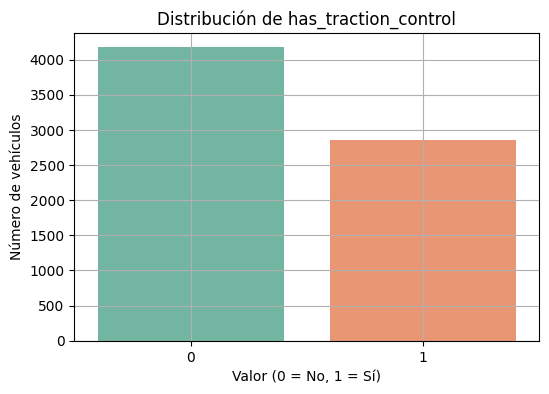

📊 Distribución de has_power_steering:


has_power_steering
1    53.069926
0    46.930074
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


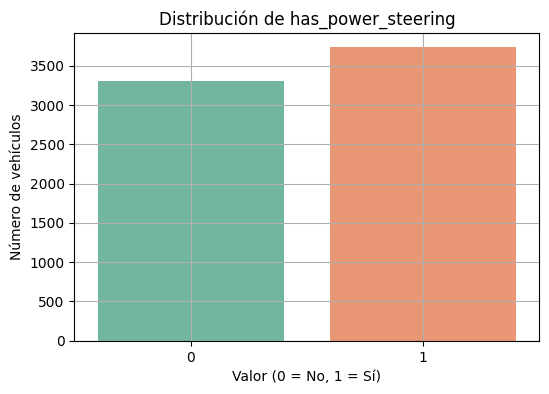

📊 Distribución de has_bluetooth:


has_bluetooth
0    64.937464
1    35.062536
Name: proportion, dtype: float64

<ipython-input-9-6ed285803374>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


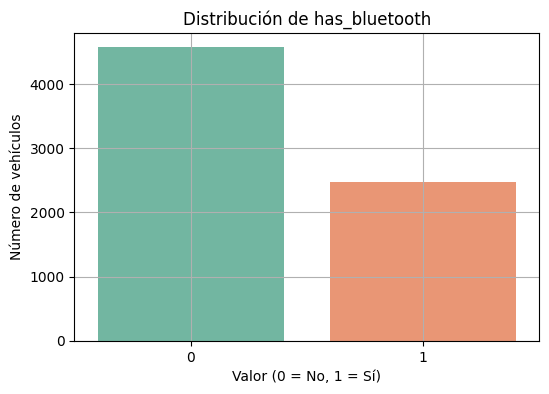

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# === 2. Lista de variables binarias de equipamiento ===
variables_binarias = [
    'has_climate_control', 'has_cruise_control', 'has_multifunction_steering',
    'has_sensors', 'has_premium_features', 'has_abs',
    'has_airbags', 'has_traction_control', 'has_power_steering', 'has_bluetooth'
]

# === 3. Analizar frecuencias y visualizar ===
for var in variables_binarias:
    print(f"📊 Distribución de {var}:")
    display(df[var].value_counts(normalize=True) * 100)  # porcentaje

    plt.figure(figsize=(6,4))
    sns.countplot(x=var, data=df, palette='Set2')
    plt.title(f'Distribución de {var}')
    plt.xlabel('Valor (0 = No, 1 = Sí)')
    plt.ylabel('Número de vehículos')
    plt.grid(True)
    plt.show()


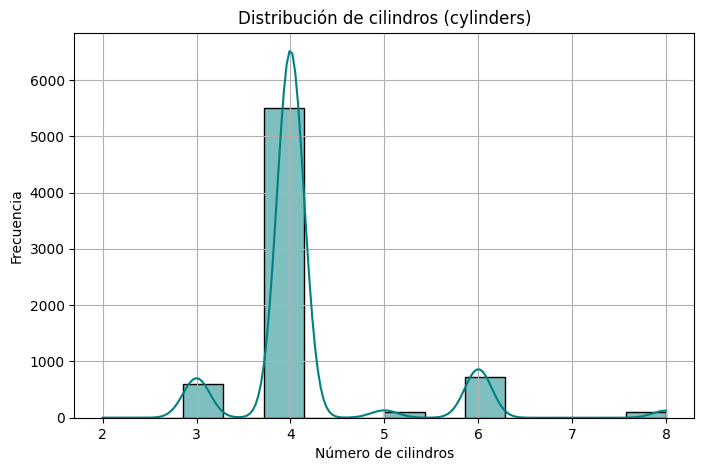

📊 Estadísticas de "cylinders":
 count    7036.000000
mean        4.198408
std         0.846836
min         2.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         8.000000
Name: cylinders, dtype: float64


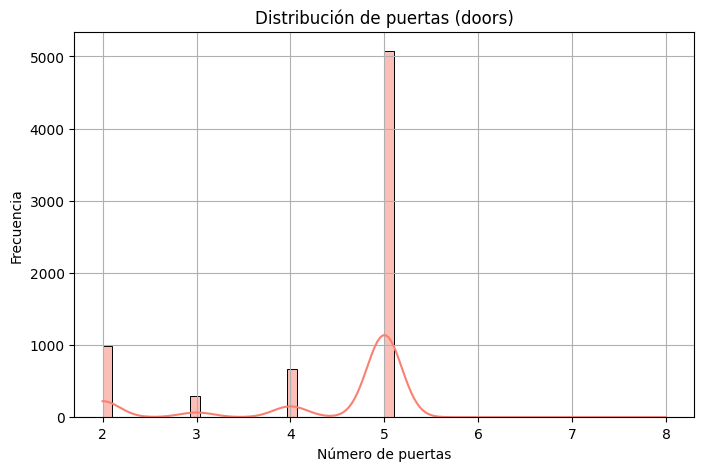

📊 Estadísticas de "doors":
 count    7036.000000
mean        4.399943
std         1.082691
min         2.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         8.000000
Name: doors, dtype: float64


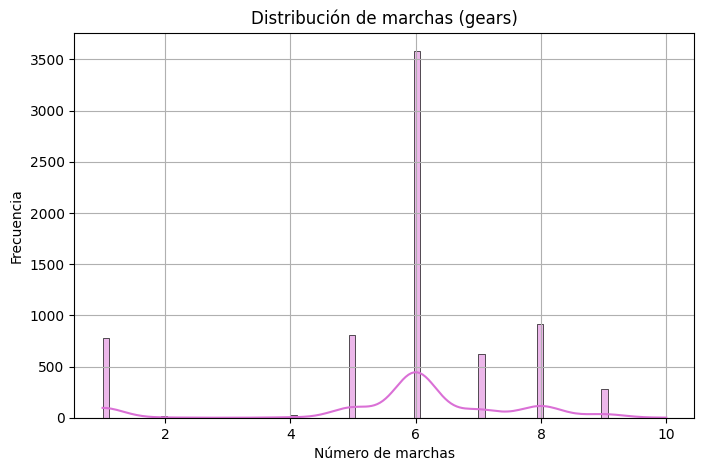

📊 Estadísticas de "gears":
 count    7036.000000
mean        5.783826
std         1.964294
min         1.000000
25%         6.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: gears, dtype: float64


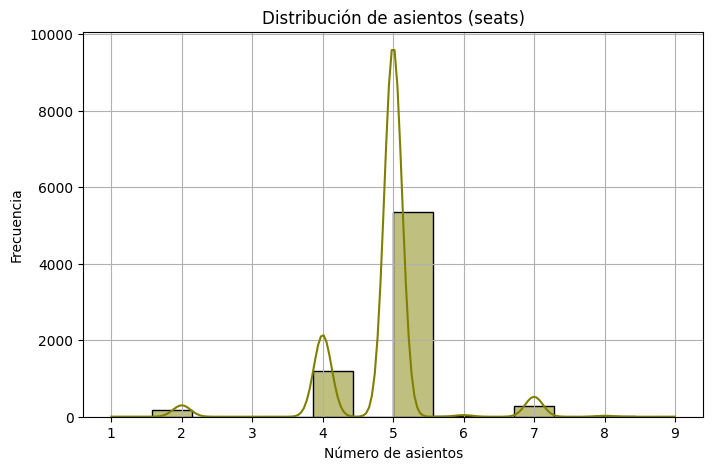

📊 Estadísticas de "seats":
 count    7036.000000
mean        4.852331
std         0.739924
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         9.000000
Name: seats, dtype: float64


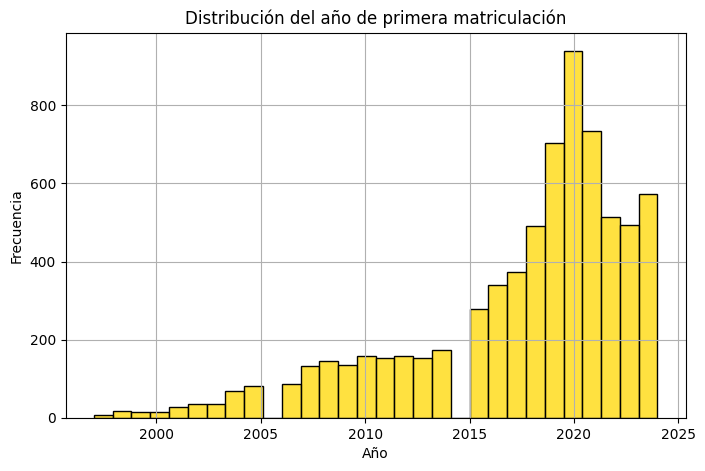

📊 Estadísticas de "year_firstRegistration":
 count    7036.000000
mean     2017.476976
std         5.478903
min      1997.000000
25%      2015.000000
50%      2019.000000
75%      2021.000000
max      2024.000000
Name: year_firstRegistration, dtype: float64


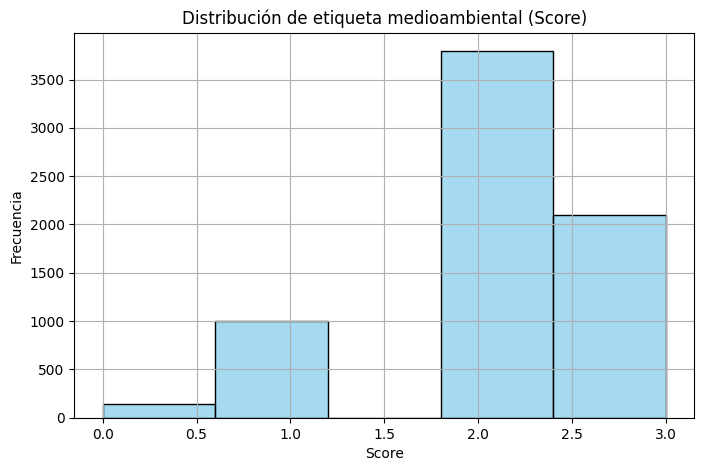

📊 Estadísticas de "env_label_score":
 count    7036.000000
mean        2.115549
std         0.712071
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: env_label_score, dtype: float64


<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


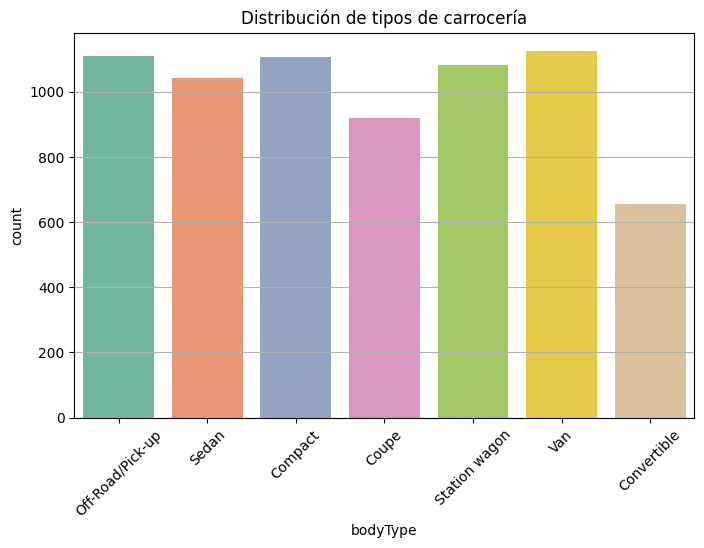

📊 Distribución de Distribución de tipos de carrocería
bodyType
Van                 15.989198
Off-Road/Pick-up    15.776009
Compact             15.704946
Station wagon       15.378056
Sedan               14.795338
Coupe               13.061399
Convertible          9.295054
Name: proportion, dtype: float64


<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


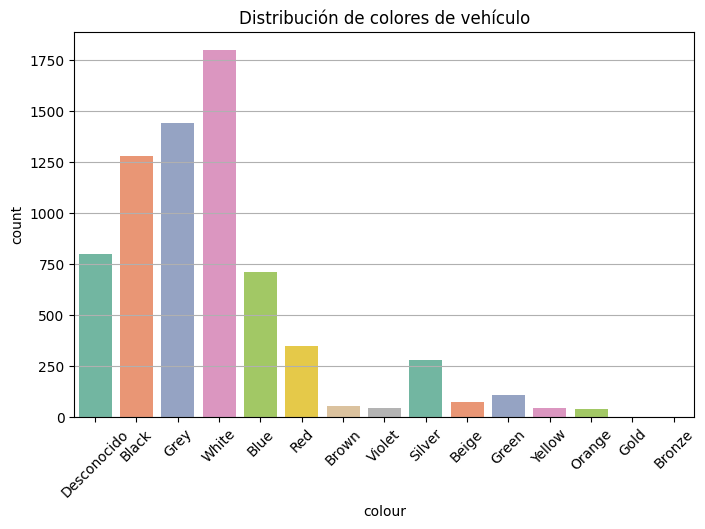

📊 Distribución de Distribución de colores de vehículo
colour
White          25.554292
Grey           20.494599
Black          18.220580
Desconocido    11.384309
Blue           10.147811
Red             4.974417
Silver          3.979534
Green           1.534963
Beige           1.037521
Brown           0.781694
Yellow          0.625355
Violet          0.611143
Orange          0.596930
Gold            0.028425
Bronze          0.028425
Name: proportion, dtype: float64


<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


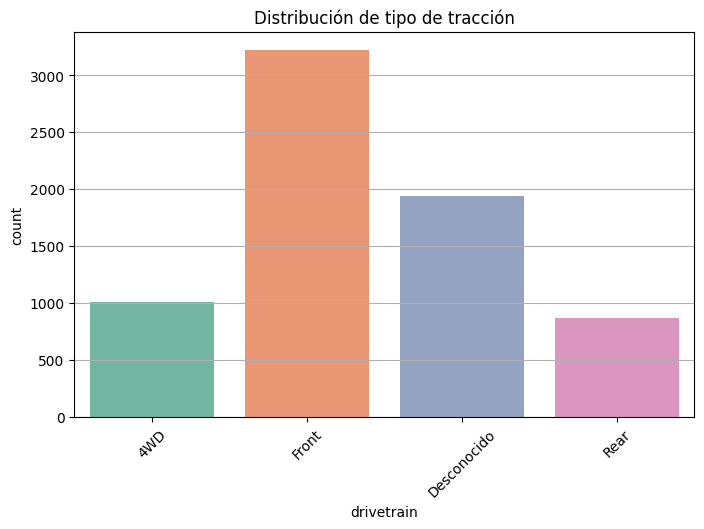

📊 Distribución de Distribución de tipo de tracción
drivetrain
Front          45.736214
Desconocido    27.544059
4WD            14.312109
Rear           12.407618
Name: proportion, dtype: float64


<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


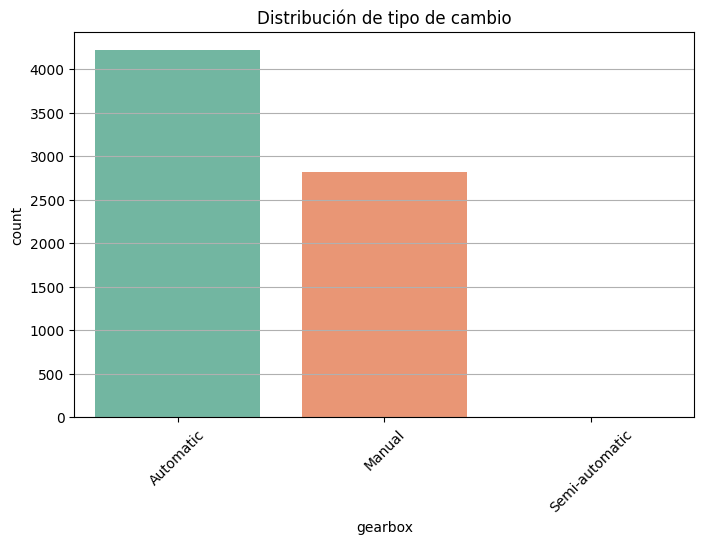

<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


📊 Distribución de Distribución de tipo de cambio
gearbox
Automatic         59.891984
Manual            40.036953
Semi-automatic     0.071063
Name: proportion, dtype: float64


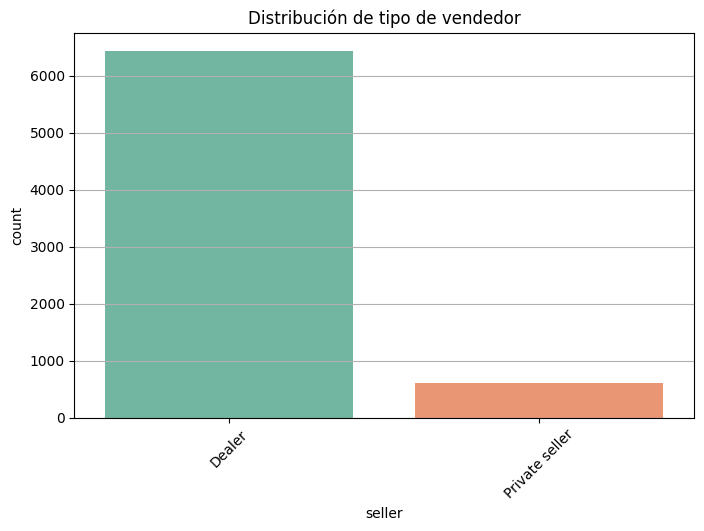

📊 Distribución de Distribución de tipo de vendedor
seller
Dealer            91.42979
Private seller     8.57021
Name: proportion, dtype: float64


<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


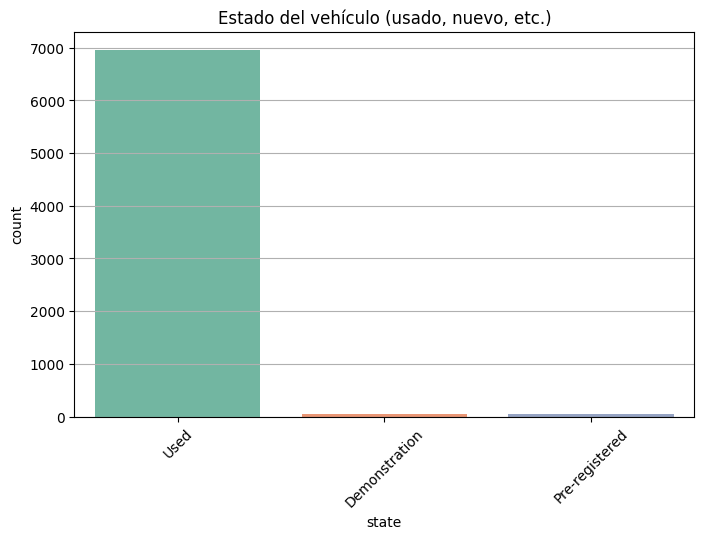

<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


📊 Distribución de Estado del vehículo (usado, nuevo, etc.)
state
Used              98.862990
Pre-registered     0.582717
Demonstration      0.554292
Name: proportion, dtype: float64


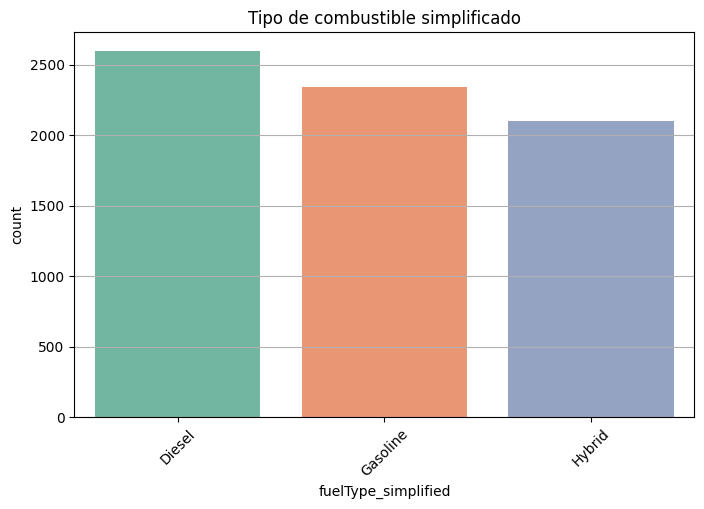

📊 Distribución de Tipo de combustible simplificado
fuelType_simplified
Diesel      36.938601
Gasoline    33.257533
Hybrid      29.803866
Name: proportion, dtype: float64


<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


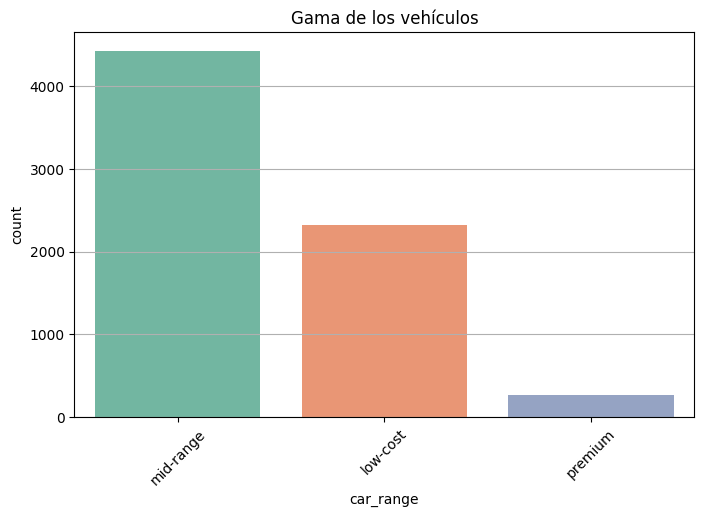

📊 Distribución de Gama de los vehículos
car_range
mid-range    63.018761
low-cost     33.101194
premium       3.880045
Name: proportion, dtype: float64


<ipython-input-11-2a044b37af17>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='Set2')


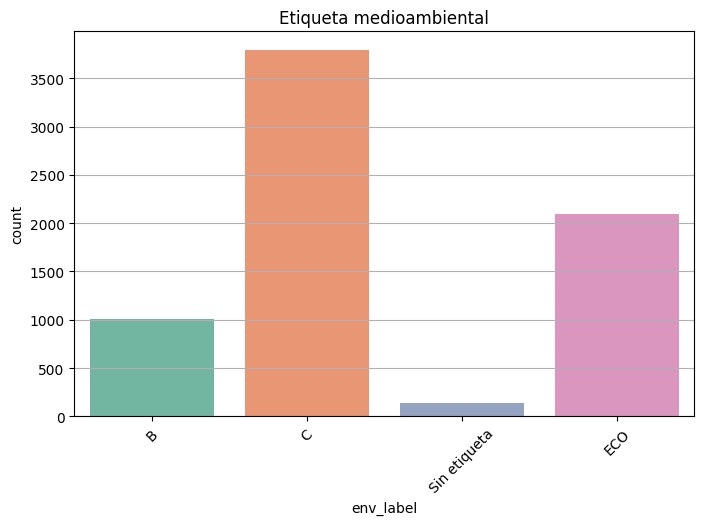

📊 Distribución de Etiqueta medioambiental
env_label
C               53.936896
ECO             29.803866
B               14.269471
Sin etiqueta     1.989767
Name: proportion, dtype: float64


<ipython-input-11-2a044b37af17>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_modelos.values, y=top_modelos.index, palette='coolwarm')


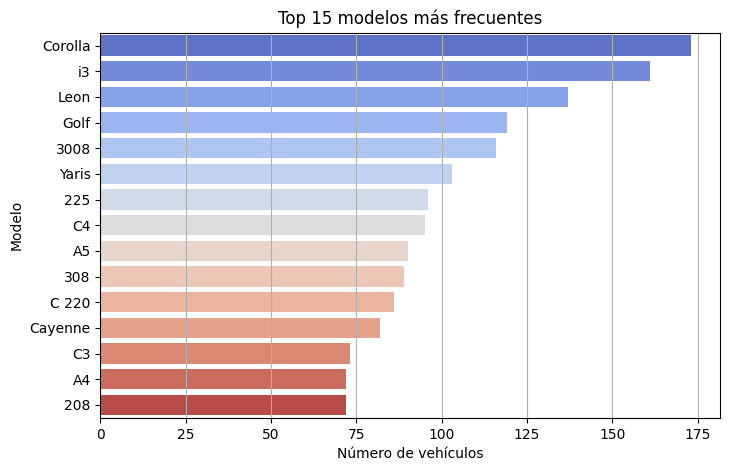

📊 Top 15 modelos más frecuentes:
model_detail
Corolla    173
i3         161
Leon       137
Golf       119
3008       116
Yaris      103
225         96
C4          95
A5          90
308         89
C 220       86
Cayenne     82
C3          73
A4          72
208         72
Name: count, dtype: int64


In [ ]:
# === CARGAR DATOS ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el Excel original (el que NO tiene dummies)
df = pd.read_excel('/content/autoscout24_dataset_limpio_def.xlsx')

# Tamaño de gráficos
plt.rcParams['figure.figsize'] = (8, 5)

# === VARIABLES NUMÉRICAS PENDIENTES ===

# 1. cylinders
sns.histplot(df['cylinders'], kde=True, color='teal')
plt.title('Distribución de cilindros (cylinders)')
plt.xlabel('Número de cilindros')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print('📊 Estadísticas de "cylinders":\n', df['cylinders'].describe())

# 2. doors
sns.histplot(df['doors'], kde=True, color='salmon')
plt.title('Distribución de puertas (doors)')
plt.xlabel('Número de puertas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print('📊 Estadísticas de "doors":\n', df['doors'].describe())

# 3. gears
sns.histplot(df['gears'], kde=True, color='orchid')
plt.title('Distribución de marchas (gears)')
plt.xlabel('Número de marchas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print('📊 Estadísticas de "gears":\n', df['gears'].describe())

# 4. seats
sns.histplot(df['seats'], kde=True, color='olive')
plt.title('Distribución de asientos (seats)')
plt.xlabel('Número de asientos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print('📊 Estadísticas de "seats":\n', df['seats'].describe())

# 5. year_firstRegistration
sns.histplot(df['year_firstRegistration'], kde=False, bins=30, color='gold')
plt.title('Distribución del año de primera matriculación')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print('📊 Estadísticas de "year_firstRegistration":\n', df['year_firstRegistration'].describe())

# 6. env_label_score
sns.histplot(df['env_label_score'], kde=False, color='skyblue', bins=5)
plt.title('Distribución de etiqueta medioambiental (Score)')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print('📊 Estadísticas de "env_label_score":\n', df['env_label_score'].describe())

# === VARIABLES CATEGÓRICAS PENDIENTES ===

# Función rápida para gráficas categóricas
def plot_categorical(var, title):
    sns.countplot(x=var, data=df, palette='Set2')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
    print('📊 Distribución de', title)
    print(df[var].value_counts(normalize=True) * 100)

# 7. bodyType
plot_categorical('bodyType', 'Distribución de tipos de carrocería')

# 8. colour
plot_categorical('colour', 'Distribución de colores de vehículo')

# 9. drivetrain
plot_categorical('drivetrain', 'Distribución de tipo de tracción')

# 10. gearbox
plot_categorical('gearbox', 'Distribución de tipo de cambio')

# 11. seller
plot_categorical('seller', 'Distribución de tipo de vendedor')

# 12. state
plot_categorical('state', 'Estado del vehículo (usado, nuevo, etc.)')

# 13. fuelType_simplified
plot_categorical('fuelType_simplified', 'Tipo de combustible simplificado')

# 14. car_range
plot_categorical('car_range', 'Gama de los vehículos')

# 15. env_label
plot_categorical('env_label', 'Etiqueta medioambiental')

# 16. model_detail
# Para model_detail solo mostramos los 15 principales por volumen
top_modelos = df['model_detail'].value_counts().nlargest(15)
sns.barplot(x=top_modelos.values, y=top_modelos.index, palette='coolwarm')
plt.title('Top 15 modelos más frecuentes')
plt.xlabel('Número de vehículos')
plt.ylabel('Modelo')
plt.grid(axis='x')
plt.show()

print('📊 Top 15 modelos más frecuentes:')
print(top_modelos)



<ipython-input-12-de0a5122166c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='brand_grouped', data=df, order=df['brand_grouped'].value_counts().index, palette='coolwarm')


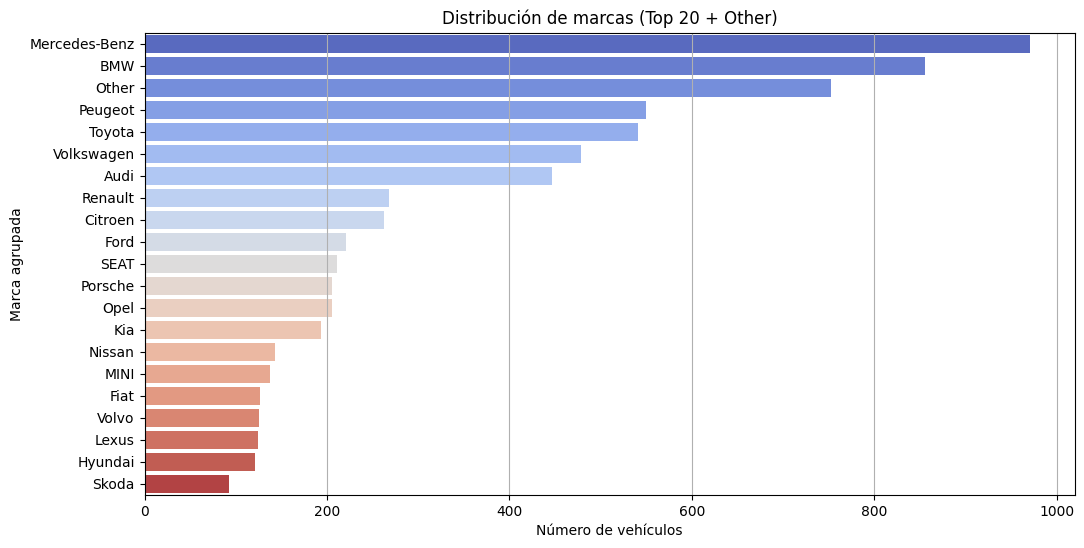

📊 Distribución de marcas agrupadas:
brand_grouped
Mercedes-Benz    13.80
BMW              12.17
Other            10.70
Peugeot           7.82
Toyota            7.69
Volkswagen        6.81
Audi              6.35
Renault           3.81
Citroen           3.72
Ford              3.14
SEAT              3.00
Porsche           2.93
Opel              2.93
Kia               2.74
Nissan            2.03
MINI              1.96
Fiat              1.81
Volvo             1.79
Lexus             1.76
Hyundai           1.72
Skoda             1.32
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar tu Excel original ===
df = pd.read_excel('/content/autoscout24_dataset_limpio_def.xlsx')  # Ajusta ruta si es distinta

# === 2. Crear columna brand (por si no la tienes separada de mark) ===
if 'brand' not in df.columns:
    df['brand'] = df['mark'].astype(str).str.split().str[0]

# === 3. Agrupar Top 20 marcas más frecuentes, resto como "Other" ===
top_20_brands = df['brand'].value_counts().nlargest(20).index
df['brand_grouped'] = df['brand'].apply(lambda x: x if x in top_20_brands else 'Other')

# === 4. Plot de distribución de brands agrupados ===
plt.figure(figsize=(12,6))
sns.countplot(y='brand_grouped', data=df, order=df['brand_grouped'].value_counts().index, palette='coolwarm')
plt.title('Distribución de marcas (Top 20 + Other)')
plt.xlabel('Número de vehículos')
plt.ylabel('Marca agrupada')
plt.grid(axis='x')
plt.show()

# === 5. Mostrar distribución numérica también ===
print('📊 Distribución de marcas agrupadas:')
print((df['brand_grouped'].value_counts(normalize=True) * 100).round(2))



In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar tu dataset
df = pd.read_excel("/content/autoscout24_dataset_limpio_def.xlsx")

# VARIABLES A ANALIZAR
categorical_vars = ['bodyType', 'colour', 'drivetrain', 'gearbox', 'fuelType_simplified',
                    'car_range', 'brand', 'state', 'seller', 'env_label']

binary_vars = ['has_climate_control', 'has_cruise_control', 'has_multifunction_steering',
               'has_sensors', 'has_premium_features', 'has_abs', 'has_airbags',
               'has_traction_control', 'has_power_steering', 'has_bluetooth']

numeric_vars = ['cylinders', 'doors', 'engineSize', 'gears', 'power', 'rawPrice',
                'seats', 'milage_num', 'car_age', 'env_label_score']

# 1. MEDIA DE PRECIO POR CATEGORÍA (incluye binarios)
print("▶ PRECIO MEDIO POR CATEGORÍA\n")

for var in categorical_vars + binary_vars:
    if var in df.columns:
        print(f"\n--- {var.upper()} ---")
        print(df.groupby(var)['rawPrice'].mean().sort_values(ascending=False).round(2))

# 2. RESUMEN ESTADÍSTICO DE VARIABLES NUMÉRICAS
print("\n\n▶ RESUMEN ESTADÍSTICO VARIABLES NUMÉRICAS")
print(df[numeric_vars].describe().round(2))

# 3. ANÁLISIS DE SIGNIFICATIVIDAD: ANOVA PARA CATEGÓRICAS
print("\n\n▶ PRUEBA ANOVA PARA PRECIO SEGÚN VARIABLES CATEGÓRICAS Y BINARIAS")
for var in categorical_vars + binary_vars:
    if var in df.columns:
        grupos = [group['rawPrice'].dropna() for name, group in df.groupby(var)]
        if len(grupos) > 1:
            f_stat, p_val = stats.f_oneway(*grupos)
            print(f"{var}: p-valor = {p_val:.4f} {'✅ Significativo' if p_val < 0.05 else '❌ No significativo'}")






▶ PRECIO MEDIO POR CATEGORÍA


--- BODYTYPE ---
bodyType
Coupe               43874.25
Off-Road/Pick-up    24850.93
Convertible         23560.40
Sedan               23500.84
Station wagon       19333.23
Van                 15129.03
Compact             15052.75
Name: rawPrice, dtype: float64

--- COLOUR ---
colour
Green          27555.42
Orange         25985.07
Grey           25018.28
Black          24646.85
Blue           24179.05
Red            24138.30
Desconocido    23588.58
Yellow         22941.55
Silver         20528.10
White          20264.83
Violet         17882.37
Brown          17066.56
Beige          14481.59
Bronze         14470.00
Gold            7499.50
Name: rawPrice, dtype: float64

--- DRIVETRAIN ---
drivetrain
4WD            43025.05
Rear           28190.76
Desconocido    23434.34
Front          15226.02
Name: rawPrice, dtype: float64

--- GEARBOX ---
gearbox
Automatic         29805.14
Manual            13025.76
Semi-automatic    11482.20
Name: rawPrice, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import ace_tools as tools

# Cargar el dataset
file_path = "/mnt/data/autoscout24_dataset_limpio_def.xlsx"
df = pd.read_excel(file_path)

# Variables categóricas a analizar
categorical_vars = ['bodyType', 'colour', 'drivetrain', 'gearbox', 'fuelType_simplified',
                    'car_range', 'brand', 'state', 'seller', 'env_label']

# Crear tabla de medias por categoría
mean_price_by_category = pd.DataFrame()

for var in categorical_vars:
    mean_prices = df.groupby(var)['rawPrice'].mean().round(2).sort_values(ascending=False)
    mean_price_by_category[var] = mean_prices

# Realizar prueba ANOVA para cada variable categórica
anova_results = {'Variable': [], 'p-valor': [], 'Significativo': []}
for var in categorical_vars:
    grupos = [group['rawPrice'].values for name, group in df.groupby(var)]
    if len(grupos) > 1:
        f_stat, p_val = stats.f_oneway(*grupos)
        anova_results['Variable'].append(var)
        anova_results['p-valor'].append(round(p_val, 4))
        anova_results['Significativo'].append('✅ Sí' if p_val < 0.05 else '❌ No')

anova_table = pd.DataFrame(anova_results)

# Estadísticos descriptivos de variables numéricas
numerical_vars = ['cylinders', 'doors', 'engineSize', 'gears', 'power',
                  'rawPrice', 'seats', 'milage_num', 'car_age', 'env_label_score']

desc_stats = df[numerical_vars].describe().T
desc_stats['median'] = df[numerical_vars].median()
desc_stats['mode'] = df[numerical_vars].mode().iloc[0]

# Mostrar tablas al usuario
tools.display_dataframe_to_user(name="Precio medio por categoría", dataframe=mean_price_by_category)
tools.display_dataframe_to_user(name="Resultados ANOVA (significatividad)", dataframe=anova_table)
tools.display_dataframe_to_user(name="Resumen estadístico de variables numéricas", dataframe=desc_stats)


ModuleNotFoundError: No module named 'ace_tools'